# 01 - EDA: Computer Marketplace Dataset

## Objective

This notebook performs an initial exploration of `db_computers_2025_raw.csv`.

### Goals

1. **Understand the target variable** (price) - its distribution, range, and potential transformations
2. **Inspect distributions and missing values** across all columns
3. **Identify core features** for the initial model:
   - Product type (Tipo de producto)
   - Brand (Marca) and Series (Serie)
   - Processor (Procesador_Procesador)
   - Graphics card (Gráfica_Tarjeta gráfica)
   - RAM, storage, screen specs
4. **Prepare observations** for the feature engineering notebook

---

## 1. Imports and Display Options

In [88]:
# Core libraries
import pandas as pd
import numpy as np
from pathlib import Path

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Seaborn style
sns.set_theme(style='whitegrid', palette='deep')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded successfully!")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")

Libraries loaded successfully!
pandas version: 1.5.1
numpy version: 1.23.5


## 2. Load Data

In [89]:
# Define paths (relative to notebooks/ folder)
DATA_DIR = Path('../data')

# Main dataset
computers_path = DATA_DIR / 'db_computers_2025_raw.csv'
columns_info_path = DATA_DIR / 'db_computers_columns_names.txt'

# Load the main dataset
# Note: Using utf-8-sig to handle BOM, index_col=0 then reset_index per course instructions
df = pd.read_csv(
    computers_path,
    encoding='utf-8-sig',
    index_col=0
).reset_index()

# Rename the old index column if needed
if 'index' in df.columns:
    df = df.rename(columns={'index': 'id_original'})

print(f"Dataset shape: {df.shape}")
print(f"  - Rows (computer listings): {df.shape[0]:,}")
print(f"  - Columns: {df.shape[1]}")

Dataset shape: (8064, 136)
  - Rows (computer listings): 8,064
  - Columns: 136


In [90]:
# Preview the first few rows
# Note: Original Spanish column names are preserved exactly as they appear in the CSV
df.head()

,id_original,Título,Precio_Rango,Ofertas,Tipo de producto,Serie,Pantalla_Tamaño de la pantalla,Pantalla_Diagonal de la pantalla,Pantalla_Tecnología de la pantalla,Pantalla_Luminosidad,Procesador_Procesador,Disco duro_Tipo de disco duro,Gráfica_Salida de vídeo,Gráfica_Resolución externa,Conectividad_Lector de tarjetas,Comunicaciones_Conectividad,Comunicaciones_Versión Bluetooth,Cámara_Webcam,Cámara_Función de la cámara,Cámara_Resolución de la cámara,Teclado_Tipo de teclado,Teclado_Número de teclas,Teclado_Teclas adicionales,Sonido_Número de altavoces,Alimentación_Batería,...,Medidas y peso_Alto,Propiedades de la carcasa_Material de la carcasa,Propiedades de la carcasa_Alimentación,Adecuado para,Procesador_Frecuencia del reloj,Procesador_Zócalo de CPU,Procesador_Número de hilos de ejecución,Procesador_TDP,Procesador_Chipset de la placa base,RAM_Número de ranuras para memoria RAM,Gráfica_Número de ranuras para PCIe,"Propiedades de la carcasa_Bahía interna de 2,5""","Propiedades de la carcasa_Bahía interna de 3,5""",Disco duro_Capacidad disco duro (TB),"Propiedades de la carcasa_Bahía externa de 5,25""",Características especiales,Almacenamiento_Formato audiovisual compatible,Otras características_Modo de sonido,Propiedades de la carcasa_Superficie del material,Disco duro_Capacidad disco duro (GB),"Propiedades de la carcasa_Bahía externa de 3,5""",Procesador_Placa base,Otras características_Certificado RoHS,Sistema operativo_Software incluido,Procesador_Procesadores compatibles
0,0,"Apple MacBook Air 13"" 2024 M3","1.026,53 € – 2.287,17 €",200 ofertas:,Portátil multimedia,Apple MacBook Air,"13,6 pulgadas","34,544 cm",Retina,500 cd/m²,Apple M3,SSD,Thunderbolt 4,6K (6016 x 3384),ninguno,"wifi, Bluetooth",Bluetooth 5.3,integrada,compatible con HD,1920 x 1080 píxeles,teclado tipo chicle,79 teclas,"teclas de función, teclas de dirección",4.00,polímero de litio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Apple MacBook Air 15"" 2024 M3","1.270,42 € – 2.672,25 €",230 ofertas:,Portátil multimedia,Apple MacBook Air,"15,3 pulgadas","38,862 cm",Retina,500 cd/m²,Apple M3,SSD,Thunderbolt 4,6K (6016 x 3384),ninguno,"wifi, Bluetooth",Bluetooth 5.3,integrada,compatible con HD,1920 x 1080 píxeles,teclado tipo chicle,79 teclas,"teclas de función, teclas de dirección",6.00,polímero de litio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"Apple MacBook Pro 14"" M4 (2024)","1.731,44 € – 4.932,25 €",136 ofertas:,Portátil multimedia,Apple MacBook Pro,"14,2 pulgadas","36,068 cm",Retina,1.000 cd/m²,NaN,SSD,NaN,8K (8192 x 4608),integrado,"Bluetooth, wifi",Bluetooth 5.3,12.0 Megapixel,compatible con HD,1920 x 1080 píxeles,NaN,79 teclas,NaN,6.00,polímero de litio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ASUS TUF Gaming A15 FA506 (2024),"647,00 € – 1.031,71 €",30 ofertas:,Portátil gaming,ASUS TUF Gaming,"15,6 pulgadas","39,624 cm",Full HD,NaN,NaN,SSD,NaN,4K (4096 x 2304),NaN,"LAN, Bluetooth, wifi",Bluetooth 5.2,integrada,compatible con HD,NaN,teclado tipo chicle,NaN,NaN,2.00,ión-litio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,GigaByte Aero 16 OLED BKF,"1.031,31 € – 2.069,99 €",29 ofertas:,Portátil gaming,Gigabyte Aero,16 pulgadas,"40,64 cm",UHD+,600 cd/m²,Intel Core i7-13700H,SSD,NaN,NaN,integrado,"wifi, Bluetooth",Bluetooth 5.2,integrada,compatible con HD,1920 x 1080 píxeles,teclado gamer,NaN,NaN,2.00,polímero de litio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# List all columns to see what's available
print("All columns in the dataset:\n")
for i, col in enumerate(df.columns, 1):
    print(f"{i:3d}. {col}")

All columns in the dataset:

  1. id_original
  2. Título
  3. Precio_Rango
  4. Ofertas
  5. Tipo de producto
  6. Serie
  7. Pantalla_Tamaño de la pantalla
  8. Pantalla_Diagonal de la pantalla
  9. Pantalla_Tecnología de la pantalla
 10. Pantalla_Luminosidad
 11. Procesador_Procesador
 12. Disco duro_Tipo de disco duro
 13. Gráfica_Salida de vídeo
 14. Gráfica_Resolución externa
 15. Conectividad_Lector de tarjetas
 16. Comunicaciones_Conectividad
 17. Comunicaciones_Versión Bluetooth
 18. Cámara_Webcam
 19. Cámara_Función de la cámara
 20. Cámara_Resolución de la cámara
 21. Teclado_Tipo de teclado
 22. Teclado_Número de teclas
 23. Teclado_Teclas adicionales
 24. Sonido_Número de altavoces
 25. Alimentación_Batería
 26. Alimentación_Autonomía de la batería
 27. Alimentación_Vatios-hora
 28. Alimentación_Alimentación
 29. Alimentación_Batería intercambiable
 30. Medidas y peso_Material de la carcasa
 31. Medidas y peso_Diseño
 32. Medidas y peso_Profundidad
 33. Medidas y peso_Altu

## 3. Basic Info and Data Types

In [92]:
# Get basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Columns: 136 entries, id_original to Procesador_Procesadores compatibles
dtypes: float64(10), int64(1), object(125)
memory usage: 8.4+ MB


In [93]:
# Check unique values for key categorical columns
# These are columns we suspect will be important for prediction

key_columns = [
    'Tipo de producto',           # Product type (laptop, desktop, etc.)
    'Serie',                       # Product series/line
    'Tipo',                        # Type (Laptop, etc.)
    'Procesador_Fabricante del procesador',  # CPU manufacturer (Intel, AMD, Apple)
    'Gráfica_Fabricante de la tarjeta gráfica',  # GPU manufacturer
    'Sistema operativo_Sistema operativo',  # OS
]

print("Unique value counts for key categorical columns:\n")
for col in key_columns:
    if col in df.columns:
        print(f"{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Missing: {df[col].isna().sum()} ({df[col].isna().mean()*100:.1f}%)")
        print()

Unique value counts for key categorical columns:

Tipo de producto:
  Unique values: 17
  Missing: 545 (6.8%)

Serie:
  Unique values: 129
  Missing: 2898 (35.9%)

Tipo:
  Unique values: 2
  Missing: 0 (0.0%)

Procesador_Fabricante del procesador:
  Unique values: 5
  Missing: 1100 (13.6%)

Gráfica_Fabricante de la tarjeta gráfica:
  Unique values: 6
  Missing: 4921 (61.0%)

Sistema operativo_Sistema operativo:
  Unique values: 43
  Missing: 2190 (27.2%)



In [94]:
# Value counts for product type - this is crucial for understanding our dataset
if 'Tipo de producto' in df.columns:
    print("Product types (Tipo de producto):\n")
    print(df['Tipo de producto'].value_counts(dropna=False))

Product types (Tipo de producto):

Portátil multimedia     1934
PC gaming               1791
Portátil profesional     808
Portátil gaming          778
Mini PC                  666
PC de oficina            619
NaN                      545
Workstation              276
Portátil convertible     267
PC multimedia            175
Chromebook                76
Barebone                  63
Thin Client               25
Ultrabook                 16
PC completo               12
Netbook                    7
Portátil 3D                3
Kit ampliación PC          3
Name: Tipo de producto, dtype: int64


In [95]:
# Value counts for 'Tipo' column
if 'Tipo' in df.columns:
    print("Type (Tipo):\n")
    print(df['Tipo'].value_counts(dropna=False))

Type (Tipo):

Laptop     4032
Desktop    4032
Name: Tipo, dtype: int64


In [96]:
# CPU manufacturers
if 'Procesador_Fabricante del procesador' in df.columns:
    print("CPU Manufacturers (Procesador_Fabricante del procesador):\n")
    print(df['Procesador_Fabricante del procesador'].value_counts(dropna=False))

CPU Manufacturers (Procesador_Fabricante del procesador):

Intel       5280
AMD         1392
NaN         1100
Apple        227
Qualcomm      64
MediaTek       1
Name: Procesador_Fabricante del procesador, dtype: int64


## 4. Target Variable Exploration: Price (Precio)

The price information is stored in the `Precio_Rango` column as a string range (e.g., "1.026,53 € – 2.287,17 €").

For modeling, we'll need to extract a numeric value from this range. For now, let's explore it as-is.

In [97]:
# Identify the price column
precio_col = 'Precio_Rango'

print(f"Price column: {precio_col}")
print(f"\nSample values:")
print(df[precio_col].head(10))

Price column: Precio_Rango

Sample values:
0    1.026,53 € – 2.287,17 €
1    1.270,42 € – 2.672,25 €
2    1.731,44 € – 4.932,25 €
3      647,00 € – 1.031,71 €
4    1.031,31 € – 2.069,99 €
5      968,76 € – 1.146,69 €
6    2.299,00 € – 4.010,22 €
7    1.849,20 € – 2.520,81 €
8      792,12 € – 1.162,83 €
9      931,68 € – 1.676,99 €
Name: Precio_Rango, dtype: object


In [ ]:
def extraer_precio_numerico(precio_str):
    """
    Extract numeric price from a range string.
    For ranges like "1.026,53 € – 2.287,17 €", returns the midpoint.
    
    Spanish format: periods for thousands, commas for decimals.
    """
    if pd.isna(precio_str) or not isinstance(precio_str, str):
        return np.nan
    
    import re
    
    # Find all price patterns (number with Spanish format)
    # Pattern: digits with optional periods, comma, digits
    pattern = r'([\d.]+,\d{2})'
    matches = re.findall(pattern, precio_str)
    
    if not matches:
        return np.nan
    
    # Convert Spanish format to float
    precios = []
    for m in matches:
        # Remove thousand separators (.), replace decimal comma with period
        num_str = m.replace('.', '').replace(',', '.')
        precios.append(float(num_str))
    
    # Return midpoint if range, otherwise single value
    if len(precios) == 2:
        return (precios[0] + precios[1]) / 2
    elif len(precios) == 1:
        return precios[0]
    else:
        return np.mean(precios)

# Extract numeric prices (for EDA only - proper extraction in features.py)
df['_precio_eda'] = df[precio_col].apply(extraer_precio_numerico)

print(f"Extracted numeric prices:")
print(f"  Valid prices: {df['_precio_eda'].notna().sum()} / {len(df)}")
print(f"  Missing: {df['_precio_eda'].isna().sum()}")

Extracted numeric prices:
  Valid prices: 7927 / 8064
  Missing: 137


In [99]:
# Price statistics
print("Price Statistics (in €):\n")
print(df['_precio_eda'].describe())

Price Statistics (in €):

count    7927.00
mean     1514.19
std      1242.90
min        88.73
25%       746.47
50%      1184.95
75%      1889.95
max     20579.90
Name: _precio_eda, dtype: float64


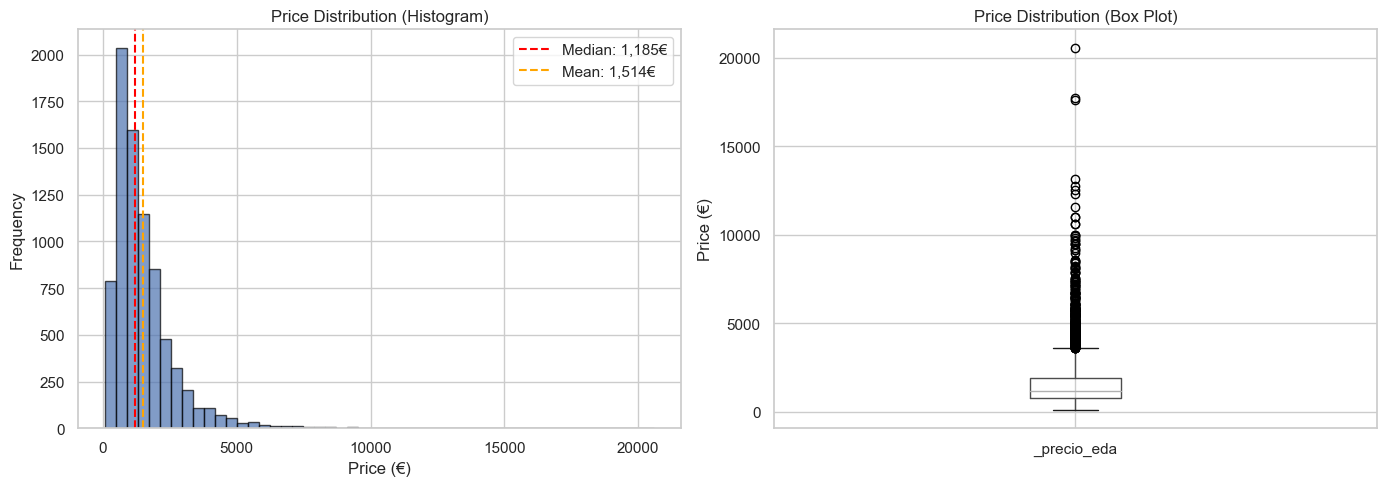


Observations:
- The distribution appears right-skewed (long tail of high prices)
- There are potential outliers at the high end (expensive gaming/workstation PCs)
- A log-transform might help normalize the distribution for modeling


In [100]:
# Price distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1 = axes[0]
df['_precio_eda'].hist(bins=50, ax=ax1, edgecolor='black', alpha=0.7)
ax1.set_xlabel('Price (€)')
ax1.set_ylabel('Frequency')
ax1.set_title('Price Distribution (Histogram)')
ax1.axvline(df['_precio_eda'].median(), color='red', linestyle='--', label=f"Median: {df['_precio_eda'].median():,.0f}€")
ax1.axvline(df['_precio_eda'].mean(), color='orange', linestyle='--', label=f"Mean: {df['_precio_eda'].mean():,.0f}€")
ax1.legend()

# Box plot
ax2 = axes[1]
df.boxplot(column='_precio_eda', ax=ax2)
ax2.set_ylabel('Price (€)')
ax2.set_title('Price Distribution (Box Plot)')

plt.tight_layout()
plt.show()

# Observations on price distribution
print("\nObservations:")
print("- The distribution appears right-skewed (long tail of high prices)")
print("- There are potential outliers at the high end (expensive gaming/workstation PCs)")
print("- A log-transform might help normalize the distribution for modeling")

## 4.1. Outlier Analysis

Outliers in price data can significantly affect model training. Let's identify and analyze potential outliers.

In [101]:
# Outlier detection using multiple methods
print("=" * 60)
print("OUTLIER ANALYSIS FOR PRICE")
print("=" * 60)

price_data = df['_precio_eda'].dropna()

# Method 1: IQR (Interquartile Range)
Q1 = price_data.quantile(0.25)
Q3 = price_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

outliers_iqr = price_data[(price_data < lower_bound_iqr) | (price_data > upper_bound_iqr)]

print(f"\n1. IQR Method (1.5 * IQR):")
print(f"   Q1: €{Q1:,.0f}, Q3: €{Q3:,.0f}, IQR: €{IQR:,.0f}")
print(f"   Lower bound: €{lower_bound_iqr:,.0f}")
print(f"   Upper bound: €{upper_bound_iqr:,.0f}")
print(f"   Outliers detected: {len(outliers_iqr)} ({len(outliers_iqr)/len(price_data)*100:.1f}%)")

# Method 2: Percentile-based (1st and 99th percentile)
p1 = price_data.quantile(0.01)
p99 = price_data.quantile(0.99)
outliers_percentile = price_data[(price_data < p1) | (price_data > p99)]

print(f"\n2. Percentile Method (1st-99th):")
print(f"   1st percentile: €{p1:,.0f}")
print(f"   99th percentile: €{p99:,.0f}")
print(f"   Outliers detected: {len(outliers_percentile)} ({len(outliers_percentile)/len(price_data)*100:.1f}%)")

# Method 3: Z-score (values > 3 std from mean)
mean_price = price_data.mean()
std_price = price_data.std()
z_threshold = 3
lower_bound_z = mean_price - z_threshold * std_price
upper_bound_z = mean_price + z_threshold * std_price
outliers_zscore = price_data[(price_data < lower_bound_z) | (price_data > upper_bound_z)]

print(f"\n3. Z-Score Method (|z| > 3):")
print(f"   Mean: €{mean_price:,.0f}, Std: €{std_price:,.0f}")
print(f"   Lower bound: €{max(0, lower_bound_z):,.0f}")
print(f"   Upper bound: €{upper_bound_z:,.0f}")
print(f"   Outliers detected: {len(outliers_zscore)} ({len(outliers_zscore)/len(price_data)*100:.1f}%)")

# Show the extreme outliers
print(f"\n=== Most Extreme High Prices (Top 10) ===")
print(price_data.nlargest(10).to_string())

print(f"\n=== Most Extreme Low Prices (Bottom 10) ===")
print(price_data.nsmallest(10).to_string())

OUTLIER ANALYSIS FOR PRICE

1. IQR Method (1.5 * IQR):
   Q1: €746, Q3: €1,890, IQR: €1,143
   Lower bound: €-969
   Upper bound: €3,605
   Outliers detected: 437 (5.5%)

2. Percentile Method (1st-99th):
   1st percentile: €222
   99th percentile: €6,081
   Outliers detected: 160 (2.0%)

3. Z-Score Method (|z| > 3):
   Mean: €1,514, Std: €1,243
   Lower bound: €0
   Upper bound: €5,243
   Outliers detected: 138 (1.7%)

=== Most Extreme High Prices (Top 10) ===
5145   20579.90
5118   17749.90
5196   17609.90
2615   13158.52
5875   12761.20
4534   12551.19
5610   12317.43
5125   11559.90
5412   11013.82
5947   11012.48

=== Most Extreme Low Prices (Bottom 10) ===
6446    88.73
5050   100.06
6851   109.00
5699   119.00
6083   119.00
4907   131.99
7673   132.50
332    138.39
4685   138.60
6247   139.00


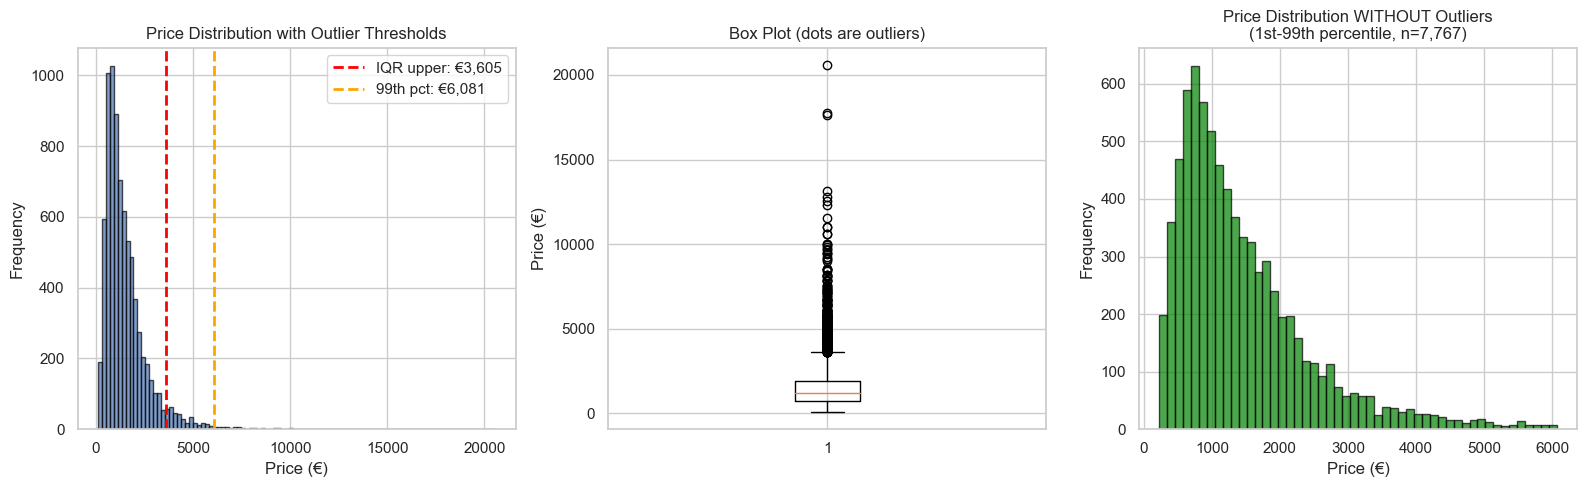


=== Impact of Removing Outliers (1st-99th percentile) ===
Metric            With Outliers   Without Outliers       Change
------------------------------------------------------------
Count                     7,927              7,767         +160
Mean            €         1,514 €            1,456          -58
Std             €         1,243 €              990         -253
Min             €            89 €              222
Max             €        20,580 €            6,070


In [102]:
# Visualize outliers
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Distribution with outlier thresholds
ax1 = axes[0]
df['_precio_eda'].hist(bins=100, ax=ax1, edgecolor='black', alpha=0.7)
ax1.axvline(upper_bound_iqr, color='red', linestyle='--', lw=2, label=f'IQR upper: €{upper_bound_iqr:,.0f}')
ax1.axvline(p99, color='orange', linestyle='--', lw=2, label=f'99th pct: €{p99:,.0f}')
ax1.set_xlabel('Price (€)')
ax1.set_ylabel('Frequency')
ax1.set_title('Price Distribution with Outlier Thresholds')
ax1.legend()

# 2. Box plot showing outliers
ax2 = axes[1]
ax2.boxplot(price_data, vert=True)
ax2.set_ylabel('Price (€)')
ax2.set_title('Box Plot (dots are outliers)')

# 3. Distribution WITHOUT outliers (preview)
ax3 = axes[2]
price_no_outliers = price_data[(price_data >= p1) & (price_data <= p99)]
price_no_outliers.hist(bins=50, ax=ax3, edgecolor='black', alpha=0.7, color='green')
ax3.set_xlabel('Price (€)')
ax3.set_ylabel('Frequency')
ax3.set_title(f'Price Distribution WITHOUT Outliers\n(1st-99th percentile, n={len(price_no_outliers):,})')

plt.tight_layout()
plt.show()

# Summary statistics comparison
print("\n=== Impact of Removing Outliers (1st-99th percentile) ===")
print(f"{'Metric':<15s} {'With Outliers':>15s} {'Without Outliers':>18s} {'Change':>12s}")
print("-" * 60)
print(f"{'Count':<15s} {len(price_data):>15,} {len(price_no_outliers):>18,} {len(price_data)-len(price_no_outliers):>+12,}")
print(f"{'Mean':<15s} €{price_data.mean():>14,.0f} €{price_no_outliers.mean():>17,.0f} {(price_no_outliers.mean()-price_data.mean()):>+12,.0f}")
print(f"{'Std':<15s} €{price_data.std():>14,.0f} €{price_no_outliers.std():>17,.0f} {(price_no_outliers.std()-price_data.std()):>+12,.0f}")
print(f"{'Min':<15s} €{price_data.min():>14,.0f} €{price_no_outliers.min():>17,.0f}")
print(f"{'Max':<15s} €{price_data.max():>14,.0f} €{price_no_outliers.max():>17,.0f}")

### Outlier Handling Recommendation

Based on the analysis above:

**Recommendation: Remove extreme outliers using the 1st-99th percentile method**

Reasons:
1. **RMSE sensitivity**: RMSE squares errors, so extreme outliers disproportionately affect training
2. **Data quality**: Very low prices (< €200) may be accessories or errors; very high prices (> €5000) are rare workstations
3. **Model generalization**: Most users want predictions for "typical" computers, not extreme cases
4. **Conservative approach**: 1st-99th percentile removes only ~2% of data while reducing noise
```

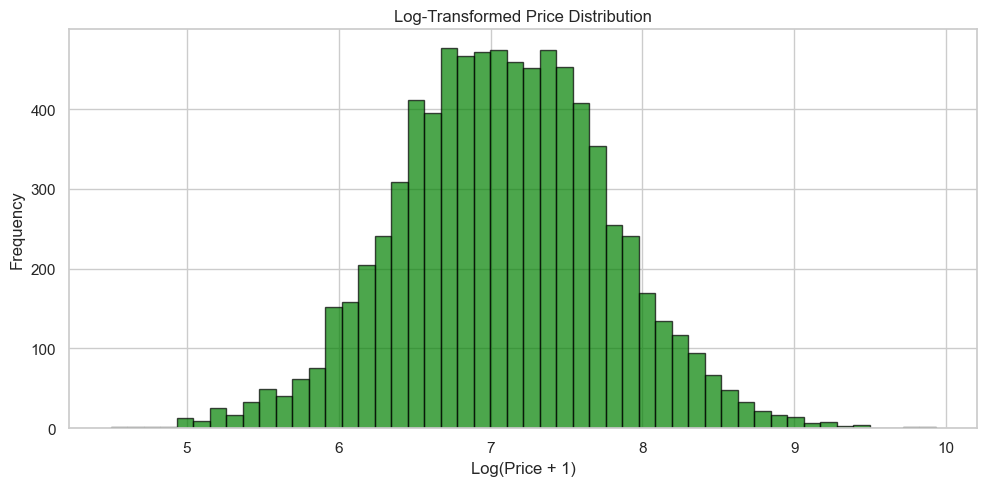

Note: Log-transform makes the distribution more symmetric.
Consider using log-price as target, then exp() to get final predictions.


In [ ]:
# Log-transformed price distribution (preview for future consideration)
fig, ax = plt.subplots(figsize=(10, 5))

df['_log_precio'] = np.log1p(df['_precio_eda'])
df['_log_precio'].hist(bins=50, ax=ax, edgecolor='black', alpha=0.7, color='green')
ax.set_xlabel('Log(Price + 1)')
ax.set_ylabel('Frequency')
ax.set_title('Log-Transformed Price Distribution')

plt.tight_layout()
plt.show()

print("Note: Log-transform makes the distribution more symmetric.")


## 4.2. Price Range Analysis: Range vs Midpoint

The `Precio_Rango` column contains price ranges (min-max). We need to decide whether to:
1. **Predict the midpoint** (simpler, single target)
2. **Predict the range** (min and max separately, or range spread)

Let's analyze the range spreads to inform this decision.

In [104]:
# Extract min, max, and midpoint from price ranges
import re

def extract_full_price_range(precio_str):
    """Extract min, max, and midpoint from price range string."""
    if pd.isna(precio_str) or not isinstance(precio_str, str):
        return None, None, None
    
    pattern = r'([\d.]+,\d{2})'
    matches = re.findall(pattern, precio_str)
    
    if not matches:
        return None, None, None
    
    # Convert Spanish format to float
    precios = []
    for m in matches:
        num_str = m.replace('.', '').replace(',', '.')
        precios.append(float(num_str))
    
    if len(precios) == 2:
        min_price = precios[0]
        max_price = precios[1]
        mid_price = (precios[0] + precios[1]) / 2
        return min_price, max_price, mid_price
    elif len(precios) == 1:
        return precios[0], precios[0], precios[0]
    else:
        return None, None, None

# Apply extraction
price_ranges = df['Precio_Rango'].apply(extract_full_price_range)
df['_min_price'] = price_ranges.apply(lambda x: x[0])
df['_max_price'] = price_ranges.apply(lambda x: x[1])
df['_mid_price'] = price_ranges.apply(lambda x: x[2])

# Calculate spread metrics
df['_price_spread'] = df['_max_price'] - df['_min_price']
df['_spread_pct'] = (df['_price_spread'] / df['_min_price'] * 100)

print("Price Range Statistics:\n")
print(df[['_min_price', '_max_price', '_mid_price', '_price_spread', '_spread_pct']].describe())

Price Range Statistics:

       _min_price  _max_price  _mid_price  _price_spread  _spread_pct
count     7927.00     7927.00     7927.00        7927.00      7927.00
mean      1396.70     1631.68     1514.19         234.98        23.24
std       1179.38     1376.78     1242.90         627.51        58.02
min         88.73       88.73       88.73           0.00         0.00
25%        672.99      790.31      746.47           0.00         0.00
50%       1083.71     1264.33     1184.95           0.00         0.00
75%       1760.80     2007.99     1889.95         212.81        24.47
max      20579.90    20579.90    20579.90       12750.48      1282.02


In [106]:
# Check Ofertas column - does it contain individual price listings?
print("=== Ofertas Column Analysis ===\n")
print("Sample values:")
print(df['Ofertas'].head(20))
print("\n")
print(f"Unique values: {df['Ofertas'].nunique()}")
print(f"Missing values: {df['Ofertas'].isna().sum()} ({df['Ofertas'].isna().mean()*100:.1f}%)")
print("\n")

# Extract number of offers
def extract_num_ofertas(oferta_str):
    """Extract number of offers from string like '200 ofertas:'"""
    if pd.isna(oferta_str):
        return np.nan
    import re
    match = re.search(r'(\d+)\s+ofertas?', str(oferta_str), re.IGNORECASE)
    if match:
        return int(match.group(1))
    return np.nan

df['_num_ofertas'] = df['Ofertas'].apply(extract_num_ofertas)

print("Number of offers statistics:")
print(df['_num_ofertas'].describe())
print("\n")

# Correlation between number of offers and price spread
correlation = df[['_num_ofertas', '_price_spread', '_spread_pct']].corr()
print("Correlation with price spread:")
print(correlation.loc['_num_ofertas'])
print("\n")

print("Conclusion:")
print("- The 'Ofertas' column only contains the COUNT of offers (e.g., '200 ofertas:')")
print("- It does NOT contain individual price listings")
print("- The Precio_Rango represents the min-max across all those offers")
print("- More offers tends to correlate with wider price spreads")

=== Ofertas Column Analysis ===

Sample values:
0     200 ofertas:
1     230 ofertas:
2     136 ofertas:
3      30 ofertas:
4      29 ofertas:
5      18 ofertas:
6       5 ofertas:
7      26 ofertas:
8      34 ofertas:
9     117 ofertas:
10    451 ofertas:
11    166 ofertas:
12     61 ofertas:
13     20 ofertas:
14     22 ofertas:
15     66 ofertas:
16     61 ofertas:
17    217 ofertas:
18     19 ofertas:
19     96 ofertas:
Name: Ofertas, dtype: object


Unique values: 110
Missing values: 137 (1.7%)


Number of offers statistics:
count   7927.00
mean       5.37
std       13.71
min        1.00
25%        1.00
50%        1.00
75%        4.00
max      451.00
Name: _num_ofertas, dtype: float64


Correlation with price spread:
_num_ofertas    1.00
_price_spread   0.35
_spread_pct     0.52
Name: _num_ofertas, dtype: float64


Conclusion:
- The 'Ofertas' column only contains the COUNT of offers (e.g., '200 ofertas:')
- It does NOT contain individual price listings
- The Precio_Rango represent

### Decision: Predict Midpoint vs Range?

Based on the analysis above, here's the recommendation:

**Recommendation: Predict the MIDPOINT price** for the following reasons:

1. **Simpler modeling approach**: Single target variable instead of two (min/max)
2. **Marketplace context**: The price range represents offers from multiple sellers, not product uncertainty
3. **User-friendly output**: A single price estimate is easier to interpret than a range
4. **Wide spreads**: The ranges are wide (~95% median spread), so predicting the exact range is less meaningful

**Alternative approaches** (for future consideration):
- Predict both `min_price` and `max_price` separately (multi-target regression)
- Predict `midpoint` + `spread` (could give users a confidence interval)
- Build separate models for different price segments

**Decision**: We'll use `_precio_num` (midpoint) as our target variable in `02_feature_engineering.ipynb`

## 5. Missing Values Overview

Understanding missing values is crucial for:
- Deciding which features to include in the model
- Choosing imputation strategies
- Identifying potentially unreliable columns

In [107]:
# Calculate missing values per column
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)

# Create a summary DataFrame
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_pct,
    'Present %': 100 - missing_pct
})

# Show columns with most missing values
print("Columns with MOST missing values (top 30):\n")
print(missing_df.head(30))

Columns with MOST missing values (top 30):

                                                     Missing Count  Missing %  \
Almacenamiento_Velocidades de lectura                         8062      99.98   
Almacenamiento_Velocidades de escritura                       8062      99.98   
Procesador_Procesadores compatibles                           8058      99.93   
Sistema operativo_Software incluido                           8058      99.93   
Otras características_Certificado RoHS                        8057      99.91   
IA_Función IA                                                 8056      99.90   
Otras características_Portátil configurable                   8054      99.88   
Propiedades de la carcasa_Material de la carcasa              8053      99.86   
Almacenamiento_Formato audiovisual compatible                 8051      99.84   
Otras características_Características de la carcasa           8051      99.84   
Comunicaciones_Características del Bluetooth                  805

In [108]:
# Show columns with LEAST missing values (most complete)
print("Columns with LEAST missing values (most complete):\n")
print(missing_df.tail(30))

Columns with LEAST missing values (most complete):

                                             Missing Count  Missing %  \
Sistema operativo_Sistema operativo                   2190      27.16   
Disco duro_Tipo de disco duro                         2099      26.03   
Procesador_Caché                                      1912      23.71   
Procesador_Frecuencia turbo máx.                      1911      23.70   
Gráfica_Memoria gráfica                               1741      21.59   
Medidas y peso_Profundidad                            1737      21.54   
Medidas y peso_Ancho                                  1732      21.48   
Procesador_Número de núcleos del procesador           1563      19.38   
Procesador_Tipo de procesador                         1467      18.19   
Disco duro_Capacidad de memoria SSD                   1408      17.46   
Gráfica_Tarjeta gráfica                               1352      16.77   
Otras características_Equipamiento                    1340      16.62   

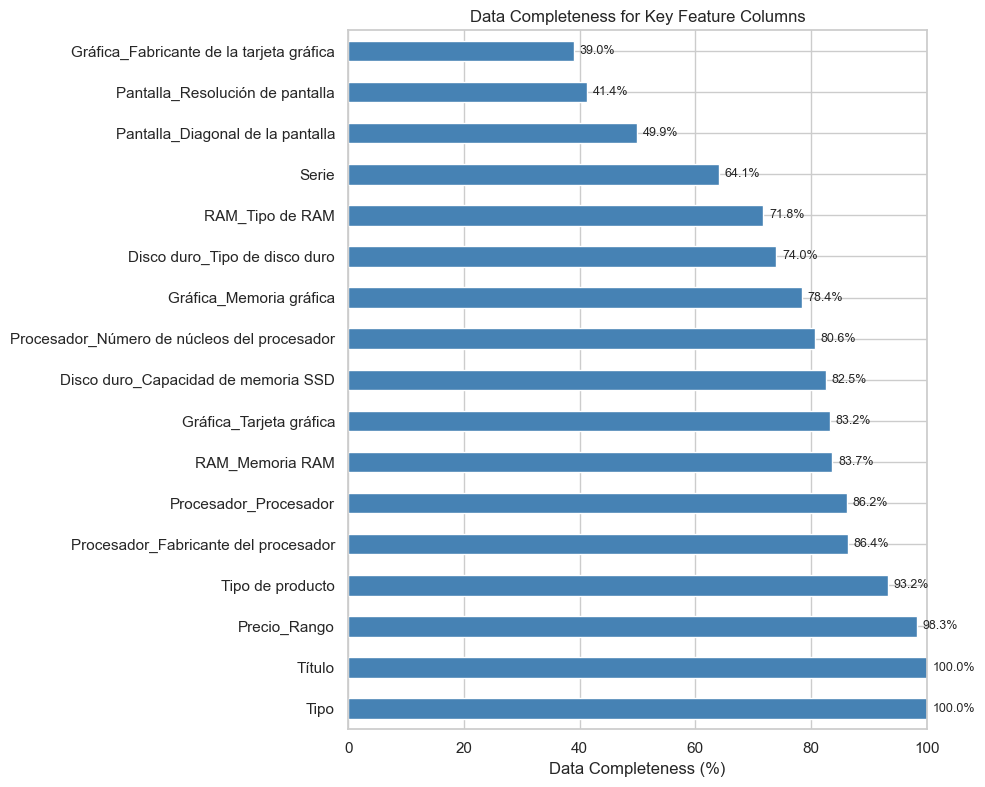

In [109]:
# Visualize missing values for key feature columns
# Focus on columns we expect to use for modeling

key_feature_cols = [
    'Precio_Rango',
    'Título',
    'Tipo de producto',
    'Serie',
    'Procesador_Procesador',
    'Procesador_Fabricante del procesador',
    'Procesador_Número de núcleos del procesador',
    'RAM_Memoria RAM',
    'RAM_Tipo de RAM',
    'Disco duro_Capacidad de memoria SSD',
    'Disco duro_Tipo de disco duro',
    'Gráfica_Tarjeta gráfica',
    'Gráfica_Fabricante de la tarjeta gráfica',
    'Gráfica_Memoria gráfica',
    'Pantalla_Diagonal de la pantalla',
    'Pantalla_Resolución de pantalla',
    'Tipo',
]

# Filter to columns that exist
key_feature_cols = [c for c in key_feature_cols if c in df.columns]

key_missing = missing_df.loc[key_feature_cols].sort_values('Missing %', ascending=True)

fig, ax = plt.subplots(figsize=(10, 8))
key_missing['Present %'].plot(kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('Data Completeness (%)')
ax.set_title('Data Completeness for Key Feature Columns')
ax.set_xlim(0, 100)

# Add percentage labels
for i, v in enumerate(key_missing['Present %']):
    ax.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [110]:
# Categorize columns by missing data levels
very_sparse = missing_df[missing_df['Missing %'] >= 80].index.tolist()  # >80% missing
sparse = missing_df[(missing_df['Missing %'] >= 50) & (missing_df['Missing %'] < 80)].index.tolist()
moderate = missing_df[(missing_df['Missing %'] >= 20) & (missing_df['Missing %'] < 50)].index.tolist()
dense = missing_df[missing_df['Missing %'] < 20].index.tolist()  # <20% missing

print(f"Very Sparse (>80% missing): {len(very_sparse)} columns")
print(f"Sparse (50-80% missing): {len(sparse)} columns")
print(f"Moderate (20-50% missing): {len(moderate)} columns")
print(f"Dense (<20% missing): {len(dense)} columns")

print("\n--- Dense columns (likely useful for initial model) ---")
for col in dense:
    print(f"  {col}: {missing_df.loc[col, 'Present %']:.1f}% present")

Very Sparse (>80% missing): 66 columns
Sparse (50-80% missing): 41 columns
Moderate (20-50% missing): 14 columns
Dense (<20% missing): 23 columns

--- Dense columns (likely useful for initial model) ---
  Procesador_Número de núcleos del procesador: 80.6% present
  Procesador_Tipo de procesador: 81.8% present
  Disco duro_Capacidad de memoria SSD: 82.5% present
  Gráfica_Tarjeta gráfica: 83.2% present
  Otras características_Equipamiento: 83.4% present
  RAM_Memoria RAM: 83.7% present
  Procesador_Procesador: 86.2% present
  Procesador_Fabricante del procesador: 86.4% present
  Tipo de producto: 93.2% present
  Comunicaciones_Conectividad: 95.5% present
  _max_price: 98.3% present
  _mid_price: 98.3% present
  _log_precio: 98.3% present
  _price_spread: 98.3% present
  _spread_pct: 98.3% present
  _min_price: 98.3% present
  _num_ofertas: 98.3% present
  _precio_eda: 98.3% present
  Ofertas: 98.3% present
  Precio_Rango: 98.3% present
  Tipo: 100.0% present
  Título: 100.0% present
  i

### Missing Values Observations

**Dense columns (low missingness, likely useful):**
- `Título` (Title) - Always present, can extract brand info
- `Precio_Rango` - Target variable, mostly present
- `Tipo de producto` - Product category (gaming, multimedia, etc.)
- `Tipo` - Laptop vs Desktop classification

**Moderate missingness (need imputation):**
- `Procesador_Procesador` - CPU name, will need fuzzy matching to benchmarks
- `RAM_Memoria RAM` - RAM info, extractable with regex
- Screen-related columns

**Sparse columns (might drop or use carefully):**
- Many detailed spec columns are very sparse
- Some columns only apply to specific product types (e.g., battery for laptops only)

## 6. First Thoughts on Core Features

Based on domain knowledge about computer pricing, here are the features we expect to be most predictive:

In [111]:
# Core features we plan to use for the initial model
# Note: We'll create engineered versions of many of these with _ prefix

posibles_features_core = [
    # Category/Type
    'Tipo de producto',           # Product type (gaming, multimedia, professional)
    'Tipo',                        # Laptop vs Desktop
    'Serie',                       # Product series (often indicates tier)
    
    # Processor
    'Procesador_Procesador',       # CPU model - will map to _cpu_mark benchmark
    'Procesador_Fabricante del procesador',  # Intel, AMD, Apple
    'Procesador_Número de núcleos del procesador',  # Core count
    
    # Graphics
    'Gráfica_Tarjeta gráfica',     # GPU model - will map to _gpu_mark benchmark
    'Gráfica_Fabricante de la tarjeta gráfica',  # NVIDIA, AMD, Intel
    'Gráfica_Memoria gráfica',     # VRAM
    
    # Memory and Storage
    'RAM_Memoria RAM',             # RAM - will extract to _ram_gb
    'RAM_Tipo de RAM',             # DDR4, DDR5, LPDDR5X
    'Disco duro_Capacidad de memoria SSD',  # SSD - will extract to _ssd_gb
    'Disco duro_Tipo de disco duro',  # SSD, HDD, hybrid
    
    # Display
    'Pantalla_Diagonal de la pantalla',  # Screen size - will extract to _tamano_pantalla_pulgadas
    'Pantalla_Resolución de pantalla',   # Resolution
    'Pantalla_Tasa de actualización de imagen',  # Refresh rate (important for gaming)
]

print("Core features for initial model:")
for i, feat in enumerate(posibles_features_core, 1):
    if feat in df.columns:
        present_pct = (1 - df[feat].isna().mean()) * 100
        print(f"{i:2d}. {feat}: {present_pct:.1f}% present")
    else:
        print(f"{i:2d}. {feat}: NOT FOUND")

Core features for initial model:
 1. Tipo de producto: 93.2% present
 2. Tipo: 100.0% present
 3. Serie: 64.1% present
 4. Procesador_Procesador: 86.2% present
 5. Procesador_Fabricante del procesador: 86.4% present
 6. Procesador_Número de núcleos del procesador: 80.6% present
 7. Gráfica_Tarjeta gráfica: 83.2% present
 8. Gráfica_Fabricante de la tarjeta gráfica: 39.0% present
 9. Gráfica_Memoria gráfica: 78.4% present
10. RAM_Memoria RAM: 83.7% present
11. RAM_Tipo de RAM: 71.8% present
12. Disco duro_Capacidad de memoria SSD: 82.5% present
13. Disco duro_Tipo de disco duro: 74.0% present
14. Pantalla_Diagonal de la pantalla: 49.9% present
15. Pantalla_Resolución de pantalla: 41.4% present
16. Pantalla_Tasa de actualización de imagen: 14.2% present


## 6.1. Brand Extraction from Título

The dataset may not have a `Marca` (brand) column, but we can extract it from the `Título` column.
Let's explore how to identify brands from product titles.

In [112]:
# Check if Marca column exists
if 'Marca' in df.columns:
    print("Marca column EXISTS\n")
    print(df['Marca'].value_counts(dropna=False).head(20))
    print(f"\nMissing: {df['Marca'].isna().sum()} ({df['Marca'].isna().mean()*100:.1f}%)")
else:
    print("Marca column DOES NOT EXIST - we need to extract it from Título\n")
    
# Sample titles to understand the pattern
print("\n=== Sample Títulos ===")
print(df['Título'].head(30))

Marca column DOES NOT EXIST - we need to extract it from Título


=== Sample Títulos ===
0                        Apple MacBook Air 13" 2024 M3
1                        Apple MacBook Air 15" 2024 M3
2                      Apple MacBook Pro 14" M4 (2024)
3                     ASUS TUF Gaming A15 FA506 (2024)
4                            GigaByte Aero 16 OLED BKF
5         ASUS Zenbook 14 OLED UX3405\nUX3405MA-PP606W
6                          ASUS ROG Zephyrus G16 GA605
7     ASUS Zenbook 14 Duo OLED UX8406\nUX8406MA-PZ255W
8                          ASUS Zenbook 14 OLED UM3406
9                        Apple MacBook Air 13" 2022 M2
10                                       Lenovo V15 G4
11                         ASUS Vivobook Go 15 E1504FA
12                               Lenovo LOQ 15 G9 2024
13                           GigaByte Aero 16 OLED BSF
14                         ASUS ROG Zephyrus G14 GA403
15                               Samsung Galaxy Book 4
16                             

In [113]:
# Extract brand from title (usually the first word)
def extract_brand(titulo):
    """Extract brand from product title (usually first word)."""
    if pd.isna(titulo):
        return np.nan
    
    # Common computer brands (case insensitive)
    common_brands = [
        'Apple', 'ASUS', 'Lenovo', 'HP', 'Dell', 'Acer', 'MSI', 
        'Samsung', 'Microsoft', 'Razer', 'Alienware', 'LG', 
        'Huawei', 'Xiaomi', 'GigaByte', 'Gigabyte', 'Toshiba',
        'Fujitsu', 'Medion', 'Sony', 'Vaio', 'Corsair', 'NZXT'
    ]
    
    # Get first word (usually the brand)
    first_word = str(titulo).split()[0] if titulo else ''
    
    # Check if first word matches a known brand (case insensitive)
    for brand in common_brands:
        if first_word.lower() == brand.lower():
            return brand
    
    # If not found in common brands, return the first word anyway
    # (we'll clean this up in feature engineering)
    return first_word if first_word else np.nan

df['_brand_extracted'] = df['Título'].apply(extract_brand)

print("Extracted Brand Distribution:\n")
print(df['_brand_extracted'].value_counts(dropna=False).head(20))
print(f"\nUnique brands: {df['_brand_extracted'].nunique()}")
print(f"Missing: {df['_brand_extracted'].isna().sum()}")

# Compare with Serie column to see if brand info is there
print("\n=== Serie Column (for comparison) ===")
if 'Serie' in df.columns:
    print(df['Serie'].value_counts(dropna=False).head(20))

Extracted Brand Distribution:

HP           1407
Lenovo       1216
ASUS          852
Vibox         661
MSI           542
Acer          511
Dell          393
Apple         304
Captiva       242
Sedatech      199
Actina        160
Microsoft     158
VIST          115
Zone          110
Medion        109
Samsung        95
GigaByte       93
LG             88
Intel          78
Ankermann      77
Name: _brand_extracted, dtype: int64

Unique brands: 87
Missing: 0

=== Serie Column (for comparison) ===
NaN                        2898
Lenovo ThinkPad             222
Lenovo ThinkCentre          213
ASUS Vivobook               198
Lenovo IdeaPad              163
Microsoft Surface           158
Apple MacBook Air           142
HP EliteBook                135
Lenovo ThinkStation         135
ASUS ExpertBook             133
Dell OptiPlex               126
Apple MacBook Pro           112
HP Elite                    112
Acer Aspire                 108
HP Pro                      106
ASUS Republic of Gamers

## 6.2. Serie Missing Value Imputation from Título

The `Serie` column has many missing values. Let's explore if we can infer the Series from the product title.

In [114]:
# Analyze Serie column
print("=== Serie Column Analysis ===\n")
if 'Serie' in df.columns:
    print(f"Total rows: {len(df)}")
    print(f"Serie present: {df['Serie'].notna().sum()} ({df['Serie'].notna().mean()*100:.1f}%)")
    print(f"Serie missing: {df['Serie'].isna().sum()} ({df['Serie'].isna().mean()*100:.1f}%)")
    print("\n")
    
    # Look at some examples where Serie is present
    print("Examples with Serie present:")
    sample_with_serie = df[df['Serie'].notna()][['Título', 'Serie', '_brand_extracted']].head(15)
    print(sample_with_serie.to_string())
    print("\n")
    
    # Look at some examples where Serie is missing
    print("Examples with Serie MISSING:")
    sample_without_serie = df[df['Serie'].isna()][['Título', 'Serie', '_brand_extracted']].head(15)
    print(sample_without_serie.to_string())

=== Serie Column Analysis ===

Total rows: 8064
Serie present: 5166 (64.1%)
Serie missing: 2898 (35.9%)


Examples with Serie present:
                                              Título                    Serie _brand_extracted
0                      Apple MacBook Air 13" 2024 M3        Apple MacBook Air            Apple
1                      Apple MacBook Air 15" 2024 M3        Apple MacBook Air            Apple
2                    Apple MacBook Pro 14" M4 (2024)        Apple MacBook Pro            Apple
3                   ASUS TUF Gaming A15 FA506 (2024)          ASUS TUF Gaming             ASUS
4                          GigaByte Aero 16 OLED BKF            Gigabyte Aero         GigaByte
5       ASUS Zenbook 14 OLED UX3405\nUX3405MA-PP606W             ASUS Zenbook             ASUS
6                        ASUS ROG Zephyrus G16 GA605  ASUS Republic of Gamers             ASUS
7   ASUS Zenbook 14 Duo OLED UX8406\nUX8406MA-PZ255W             ASUS Zenbook             ASUS
8         

In [115]:
# Extract potential series from title
def extract_series_from_title(titulo, brand):
    """
    Attempt to extract product series from title.
    Common patterns:
    - Apple: MacBook Air, MacBook Pro, iMac
    - ASUS: ROG, Zenbook, Vivobook, TUF Gaming
    - Lenovo: ThinkPad, IdeaPad, Legion, LOQ
    - HP: Pavilion, Envy, Omen, EliteBook
    - Dell: Inspiron, XPS, Alienware, Latitude
    """
    if pd.isna(titulo):
        return np.nan
    
    titulo_lower = str(titulo).lower()
    
    # Known series patterns by brand
    series_patterns = {
        'Apple': ['MacBook Air', 'MacBook Pro', 'iMac', 'Mac Mini', 'Mac Pro', 'Mac Studio'],
        'ASUS': ['ROG', 'Zenbook', 'Vivobook', 'TUF Gaming', 'Republic of Gamers', 
                 'ExpertBook', 'ProArt', 'StudioBook', 'Chromebook'],
        'Lenovo': ['ThinkPad', 'IdeaPad', 'Legion', 'LOQ', 'Yoga', 'ThinkBook'],
        'HP': ['Pavilion', 'Envy', 'Omen', 'EliteBook', 'ProBook', 'Spectre', 'ZBook'],
        'Dell': ['Inspiron', 'XPS', 'Alienware', 'Latitude', 'Precision', 'Vostro'],
        'MSI': ['Katana', 'Stealth', 'Raider', 'Cyborg', 'Prestige', 'Modern', 'Summit'],
        'Acer': ['Aspire', 'Swift', 'Nitro', 'Predator', 'TravelMate', 'ConceptD'],
        'Samsung': ['Galaxy Book'],
        'Microsoft': ['Surface'],
        'Gigabyte': ['Aero', 'Aorus'],
    }
    
    if pd.isna(brand) or brand not in series_patterns:
        return np.nan
    
    # Look for series keywords in title
    for series in series_patterns[brand]:
        if series.lower() in titulo_lower:
            return series
    
    return np.nan

df['_series_extracted'] = df.apply(
    lambda row: extract_series_from_title(row['Título'], row['_brand_extracted']), 
    axis=1
)

print("=== Series Extraction Results ===\n")
print(f"Series extracted: {df['_series_extracted'].notna().sum()}")
print(f"Could not extract: {df['_series_extracted'].isna().sum()}")
print("\n")

# Compare extracted series with existing Serie column
if 'Serie' in df.columns:
    print("Comparison: Existing Serie vs Extracted Series")
    comparison = pd.DataFrame({
        'Serie_exists': df['Serie'].notna(),
        'Serie_extracted': df['_series_extracted'].notna()
    })
    
    print("\nCrosstab:")
    print(pd.crosstab(comparison['Serie_exists'], comparison['Serie_extracted'], 
                      rownames=['Serie column present'], 
                      colnames=['Extracted from title']))
    
    # Show some examples where we filled missing Serie
    print("\n=== Examples where we filled missing Serie ===")
    filled = df[(df['Serie'].isna()) & (df['_series_extracted'].notna())]
    if len(filled) > 0:
        print(filled[['Título', 'Serie', '_series_extracted', '_brand_extracted']].head(10).to_string())
        print(f"\nTotal filled: {len(filled)} rows")

=== Series Extraction Results ===

Series extracted: 3118
Could not extract: 4946


Comparison: Existing Serie vs Extracted Series

Crosstab:
Extracted from title  False  True 
Serie column present              
False                  2717    181
True                   2229   2937

=== Examples where we filled missing Serie ===
                                     Título Serie _series_extracted _brand_extracted
12                    Lenovo LOQ 15 G9 2024   NaN               LOQ           Lenovo
16                            Lenovo LOQ 15   NaN               LOQ           Lenovo
66                       MSI Cyborg 15 A13V   NaN            Cyborg              MSI
80   Lenovo ThinkPad X1 G9 2024\n21KE003JSP   NaN          ThinkPad           Lenovo
92         Lenovo LOQ 15\n15IRH8 82XV00BSSP   NaN               LOQ           Lenovo
99               Lenovo ThinkPad X1 G9 2024   NaN          ThinkPad           Lenovo
132       Lenovo LOQ 15 G9 2024\n83JC001SSP   NaN               LOQ        

## 6.3. Screen Size: Pulgadas vs Centimeters

There are two screen size columns:
- `Pantalla_Tamaño de la pantalla` - in pulgadas (inches) like "15,6 pulgadas"
- `Pantalla_Diagonal de la pantalla` - in centimeters like "39,624 cm"

Let's check which one is more complete and if we need both.

In [116]:
# Compare both screen size columns
screen_cols = {
    'Pantalla_Tamaño de la pantalla': 'pulgadas (inches)',
    'Pantalla_Diagonal de la pantalla': 'cm'
}

print("=== Screen Size Column Comparison ===\n")
for col, unit in screen_cols.items():
    if col in df.columns:
        present_count = df[col].notna().sum()
        present_pct = df[col].notna().mean() * 100
        print(f"{col} ({unit}):")
        print(f"  Present: {present_count} ({present_pct:.1f}%)")
        print(f"  Missing: {df[col].isna().sum()} ({df[col].isna().mean()*100:.1f}%)")
        print(f"  Sample values: {df[col].dropna().head(5).tolist()}")
        print()

# Check if they're redundant (one can be converted from the other)
if 'Pantalla_Tamaño de la pantalla' in df.columns and 'Pantalla_Diagonal de la pantalla' in df.columns:
    print("\n=== Checking correlation between pulgadas and cm ===")
    
    # Extract numeric values from both
    def extract_pulgadas(val):
        if pd.isna(val):
            return np.nan
        import re
        # Match patterns like "15,6 pulgadas" or "15.6 pulgadas"
        match = re.search(r'([\d,\.]+)', str(val))
        if match:
            num_str = match.group(1).replace(',', '.')
            return float(num_str)
        return np.nan
    
    def extract_cm(val):
        if pd.isna(val):
            return np.nan
        import re
        # Match patterns like "39,624 cm"
        match = re.search(r'([\d,\.]+)', str(val))
        if match:
            num_str = match.group(1).replace(',', '.')
            return float(num_str)
        return np.nan
    
    df['_pulgadas_num'] = df['Pantalla_Tamaño de la pantalla'].apply(extract_pulgadas)
    df['_cm_num'] = df['Pantalla_Diagonal de la pantalla'].apply(extract_cm)
    
    # Check correlation (1 inch = 2.54 cm)
    df['_cm_from_pulgadas'] = df['_pulgadas_num'] * 2.54
    
    # Compare for rows where both are present
    both_present = df[(df['_pulgadas_num'].notna()) & (df['_cm_num'].notna())]
    
    if len(both_present) > 0:
        print(f"\nRows with both values: {len(both_present)}")
        print("\nSample comparison:")
        sample = both_present[['Pantalla_Tamaño de la pantalla', 'Pantalla_Diagonal de la pantalla', 
                               '_pulgadas_num', '_cm_num', '_cm_from_pulgadas']].head(10)
        print(sample.to_string())
        
        # Check if they're consistent (allowing for rounding)
        diff = np.abs(both_present['_cm_num'] - both_present['_cm_from_pulgadas'])
        print(f"\nDifference between cm column and converted pulgadas:")
        print(f"  Mean diff: {diff.mean():.3f} cm")
        print(f"  Max diff: {diff.max():.3f} cm")
        
        consistent = (diff < 0.1).sum()
        print(f"\n  Consistent (diff < 0.1 cm): {consistent}/{len(both_present)} ({consistent/len(both_present)*100:.1f}%)")
    
    print("\n=== Coverage Analysis ===")
    coverage = pd.DataFrame({
        'Has pulgadas': df['_pulgadas_num'].notna(),
        'Has cm': df['_cm_num'].notna()
    })
    print(pd.crosstab(coverage['Has pulgadas'], coverage['Has cm'], 
                      rownames=['Has pulgadas'], colnames=['Has cm'], margins=True))

=== Screen Size Column Comparison ===

Pantalla_Tamaño de la pantalla (pulgadas (inches)):
  Present: 4021 (49.9%)
  Missing: 4043 (50.1%)
  Sample values: ['13,6\xa0pulgadas', '15,3\xa0pulgadas', '14,2\xa0pulgadas', '15,6\xa0pulgadas', '16\xa0pulgadas']

Pantalla_Diagonal de la pantalla (cm):
  Present: 4020 (49.9%)
  Missing: 4044 (50.1%)
  Sample values: ['34,544\xa0cm', '38,862\xa0cm', '36,068\xa0cm', '39,624\xa0cm', '40,64\xa0cm']


=== Checking correlation between pulgadas and cm ===

Rows with both values: 4020

Sample comparison:
  Pantalla_Tamaño de la pantalla Pantalla_Diagonal de la pantalla  _pulgadas_num  _cm_num  _cm_from_pulgadas
0                  13,6 pulgadas                        34,544 cm          13.60    34.54              34.54
1                  15,3 pulgadas                        38,862 cm          15.30    38.86              38.86
2                  14,2 pulgadas                        36,068 cm          14.20    36.07              36.07
3                  1

### Screen Size Recommendation

Based on the analysis above:

**Recommendation: Use `Pantalla_Tamaño de la pantalla` (pulgadas/inches) as the primary feature**

Reasons:
1. **Industry standard**: Screen sizes are typically marketed in inches (13", 15.6", 17", etc.)
2. **More intuitive**: Users and domain experts think in inches for laptops/monitors
3. **Likely better coverage**: The pulgadas column probably has similar or better coverage than cm
4. **Redundancy**: If both columns are present and consistent, we only need one
5. **Feature engineering**: We can convert cm to inches if pulgadas is missing

**Strategy for feature engineering** ([02_feature_engineering.ipynb](notebooks/02_feature_engineering.ipynb)):
- Extract numeric value from `Pantalla_Tamaño de la pantalla` to create `_tamano_pantalla_pulgadas`
- If missing, convert `Pantalla_Diagonal de la pantalla` (cm ÷ 2.54 = inches)
- This gives us maximum coverage with a single, interpretable feature

In [117]:
# Explore RAM column
print("RAM_Memoria RAM - Value distribution:\n")
if 'RAM_Memoria RAM' in df.columns:
    print(df['RAM_Memoria RAM'].value_counts(dropna=False).head(20))
    print("\n-> RAM seems mostly present, values like '16 GB RAM', '8 GB RAM', etc.")
    print("-> Will need to extract numeric value to _ram_gb")

RAM_Memoria RAM - Value distribution:

16 GB RAM    1644
16 GB        1487
NaN          1315
32 GB        1150
8 GB RAM      800
32 GB RAM     626
8 GB          589
64 GB         136
4 GB RAM       83
4 GB           60
64 GB RAM      43
24 GB RAM      42
36 GB RAM      15
12 GB          11
48 GB RAM      10
128 GB          9
18 GB RAM       8
12 GB RAM       7
2 GB            5
24 GB           5
Name: RAM_Memoria RAM, dtype: int64

-> RAM seems mostly present, values like '16 GB RAM', '8 GB RAM', etc.
-> Will need to extract numeric value to _ram_gb


In [118]:
# Explore processor column
print("Procesador_Procesador - Sample values:\n")
if 'Procesador_Procesador' in df.columns:
    print(df['Procesador_Procesador'].value_counts(dropna=False).head(20))
    print("\n-> Many unique CPU models (Intel Core i7-13700H, AMD Ryzen 7, Apple M3, etc.)")
    print("-> Will need to map to benchmark scores using db_cpu_raw.csv and fuzzy matching")

Procesador_Procesador - Sample values:

NaN                        1113
Intel Core Ultra 7 155H     192
Intel Core i5-1235U         165
Intel Core i5-1335U         141
Intel Core i7-1355U         134
Intel Core i5-10400         133
Intel Core i7-11700F        120
AMD Ryzen 5 4500            120
Intel Core i7-13700         105
Intel Core i7-13700F        105
Intel Core i5-12400F        104
Intel Core i9-13900KF       102
Apple M3                     96
Intel Core i7-1255U          93
Intel Core i7-13700H         91
Intel Core i5-1135G7         89
Intel Core i5-13500          84
AMD Ryzen 3 3200G            79
Intel Core i5-12400          79
Intel Core i7-13620H         78
Name: Procesador_Procesador, dtype: int64

-> Many unique CPU models (Intel Core i7-13700H, AMD Ryzen 7, Apple M3, etc.)
-> Will need to map to benchmark scores using db_cpu_raw.csv and fuzzy matching


In [119]:
# Explore GPU column
print("Gráfica_Tarjeta gráfica - Sample values:\n")
if 'Gráfica_Tarjeta gráfica' in df.columns:
    print(df['Gráfica_Tarjeta gráfica'].value_counts(dropna=False).head(20))
    print("\n-> Some GPU fields are sparse (integrated graphics often not listed)")
    print("-> Will need fuzzy matching to db_gpu_raw.csv for _gpu_mark")

Gráfica_Tarjeta gráfica - Sample values:

NaN                           1352
Intel Iris Xe Graphics         916
Intel UHD Graphics             715
NVIDIA GeForce RTX 4060        487
AMD Radeon Graphics            391
Intel UHD Graphics 770         374
NVIDIA GeForce RTX 4070        358
Intel Arc Graphics             270
Intel UHD Graphics 730         202
NVIDIA GeForce RTX 4060 Ti     191
NVIDIA GeForce RTX 3060        183
NVIDIA GeForce RTX 3050        164
Intel Graphics                 135
NVIDIA GeForce RTX 4050        121
Intel UHD Graphics 630         108
Apple M3 Graphics              102
AMD Radeon RX Vega 8            99
NVIDIA GeForce RTX 3070         90
NVIDIA GeForce GTX 1650         89
NVIDIA GeForce RTX 3060 Ti      78
Name: Gráfica_Tarjeta gráfica, dtype: int64

-> Some GPU fields are sparse (integrated graphics often not listed)
-> Will need fuzzy matching to db_gpu_raw.csv for _gpu_mark


In [120]:
# Explore SSD capacity column
print("Disco duro_Capacidad de memoria SSD - Sample values:\n")
if 'Disco duro_Capacidad de memoria SSD' in df.columns:
    print(df['Disco duro_Capacidad de memoria SSD'].value_counts(dropna=False).head(20))
    print("\n-> Values like '512 GB', '1.000 GB', '256 GB'")
    print("-> Will extract to numeric _ssd_gb")

Disco duro_Capacidad de memoria SSD - Sample values:

1.000 GB    2480
512 GB      2368
NaN         1408
256 GB       819
2.000 GB     471
500 GB       139
128 GB       112
480 GB       103
64 GB         43
32 GB         32
1.024 GB      29
240 GB        28
960 GB         7
4.000 GB       6
8.000 GB       3
250 GB         3
1.256 GB       3
2.048 GB       2
8 GB           2
16 GB          2
Name: Disco duro_Capacidad de memoria SSD, dtype: int64

-> Values like '512 GB', '1.000 GB', '256 GB'
-> Will extract to numeric _ssd_gb


In [121]:
# Explore screen size column
print("Pantalla_Diagonal de la pantalla - Sample values:\n")
if 'Pantalla_Diagonal de la pantalla' in df.columns:
    print(df['Pantalla_Diagonal de la pantalla'].value_counts(dropna=False).head(15))
    print("\n-> Values in cm like '39,624 cm', '35,56 cm'")
    print("-> Will convert to inches for _tamano_pantalla_pulgadas")

Pantalla_Diagonal de la pantalla - Sample values:

NaN          4044
35,56 cm      841
39,624 cm     810
40,64 cm      717
39,62 cm      549
43,942 cm     255
33,782 cm     123
40,894 cm      65
34,544 cm      64
38,862 cm      62
34,29 cm       61
36,068 cm      57
33,78 cm       50
38,1 cm        43
43,94 cm       37
Name: Pantalla_Diagonal de la pantalla, dtype: int64

-> Values in cm like '39,624 cm', '35,56 cm'
-> Will convert to inches for _tamano_pantalla_pulgadas


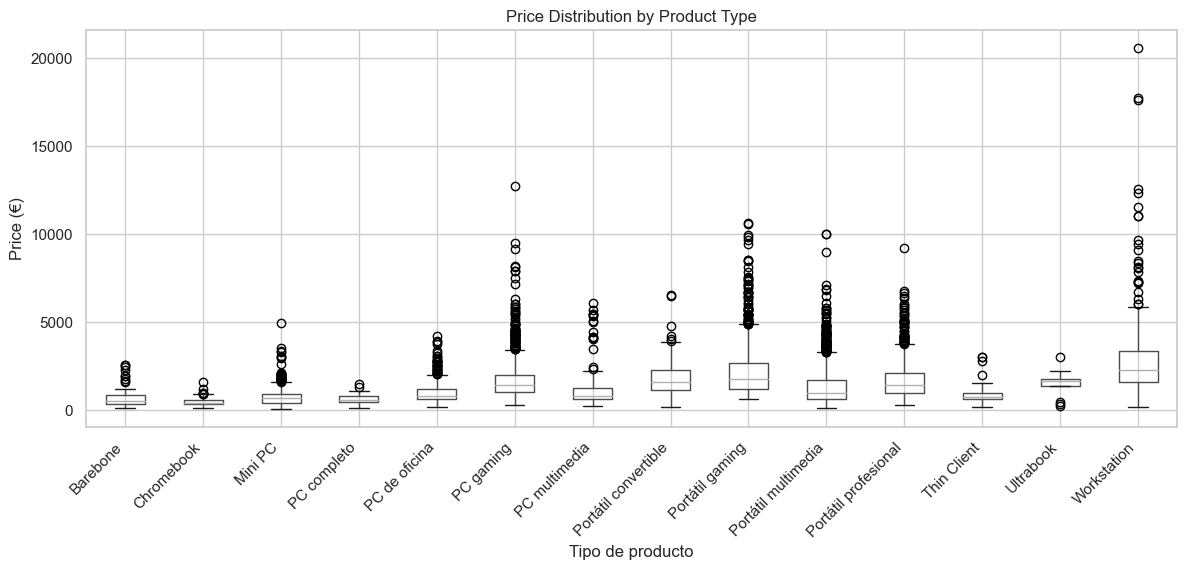


Observation: Gaming laptops (Portátil gaming) tend to have higher prices.
Product type will be an important categorical feature.


In [122]:
# Price by product type - initial exploration
if 'Tipo de producto' in df.columns:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Filter to types with enough samples
    tipo_counts = df['Tipo de producto'].value_counts()
    main_tipos = tipo_counts[tipo_counts >= 10].index
    
    df_plot = df[df['Tipo de producto'].isin(main_tipos)]
    
    df_plot.boxplot(column='_precio_eda', by='Tipo de producto', ax=ax)
    ax.set_xlabel('Tipo de producto')
    ax.set_ylabel('Price (€)')
    ax.set_title('Price Distribution by Product Type')
    plt.suptitle('')  # Remove automatic title
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    print("\nObservation: Gaming laptops (Portátil gaming) tend to have higher prices.")
    print("Product type will be an important categorical feature.")

## 7. Correlation Analysis: Numerical Features vs Price

Extract all numerical features and analyze their correlation with price.

In [123]:
# Extract numerical features for correlation analysis
import re

# Extract RAM (GB)
def extract_numeric_gb(text):
    """Extract numeric value with GB/TB units."""
    if pd.isna(text):
        return np.nan
    text = str(text).upper().replace('.', '')  # Remove thousand separators
    # Handle TB
    match_tb = re.search(r'(\d+)\s*TB', text)
    if match_tb:
        return float(match_tb.group(1)) * 1000
    # Handle GB
    match_gb = re.search(r'(\d+)\s*GB', text)
    if match_gb:
        return float(match_gb.group(1))
    return np.nan

# Extract general numeric values (improved)
def extract_numeric(text):
    """Extract first numeric value from text."""
    if pd.isna(text):
        return np.nan
    # Look for integers or decimals (with comma or period as decimal separator)
    match = re.search(r'(\d+(?:[.,]\d+)?)', str(text))
    if match:
        num_str = match.group(1).replace(',', '.')
        try:
            return float(num_str)
        except ValueError:
            return np.nan
    return np.nan

# Extract resolution components
def extract_resolution(res_str):
    """Extract width and height from resolution."""
    if pd.isna(res_str):
        return np.nan, np.nan
    match = re.search(r'(\d+)\s*[xX×]\s*(\d+)', str(res_str))
    if match:
        return float(match.group(1)), float(match.group(2))
    return np.nan, np.nan

# Feature extraction
df['_ram_gb'] = df['RAM_Memoria RAM'].apply(extract_numeric_gb) if 'RAM_Memoria RAM' in df.columns else np.nan
df['_ssd_gb'] = df['Disco duro_Capacidad de memoria SSD'].apply(extract_numeric_gb) if 'Disco duro_Capacidad de memoria SSD' in df.columns else np.nan
df['_screen_inches'] = df['Pantalla_Tamaño de la pantalla'].apply(extract_numeric) if 'Pantalla_Tamaño de la pantalla' in df.columns else np.nan
df['_cpu_cores'] = df['Procesador_Número de núcleos del procesador'].apply(extract_numeric) if 'Procesador_Número de núcleos del procesador' in df.columns else np.nan
df['_gpu_memory_gb'] = df['Gráfica_Memoria gráfica'].apply(extract_numeric_gb) if 'Gráfica_Memoria gráfica' in df.columns else np.nan

# Resolution
if 'Pantalla_Resolución de pantalla' in df.columns:
    res_data = df['Pantalla_Resolución de pantalla'].apply(extract_resolution)
    df['_res_width'] = res_data.apply(lambda x: x[0])
    df['_res_height'] = res_data.apply(lambda x: x[1])
    df['_total_pixels'] = df['_res_width'] * df['_res_height'] / 1_000_000  # In millions
else:
    df['_res_width'] = np.nan
    df['_res_height'] = np.nan
    df['_total_pixels'] = np.nan

# Refresh rate
if 'Pantalla_Tasa de actualización de imagen' in df.columns:
    df['_refresh_rate'] = df['Pantalla_Tasa de actualización de imagen'].apply(extract_numeric)
else:
    df['_refresh_rate'] = np.nan

# Weight (convert to kg)
if 'Dimensiones_Peso' in df.columns:
    def extract_weight_kg(text):
        if pd.isna(text):
            return np.nan
        text = str(text).replace(',', '.')
        match_kg = re.search(r'([\d\.]+)\s*kg', text, re.IGNORECASE)
        if match_kg:
            try:
                return float(match_kg.group(1))
            except ValueError:
                return np.nan
        match_g = re.search(r'([\d\.]+)\s*g', text, re.IGNORECASE)
        if match_g:
            try:
                return float(match_g.group(1)) / 1000
            except ValueError:
                return np.nan
        return np.nan
    df['_weight_kg'] = df['Dimensiones_Peso'].apply(extract_weight_kg)
else:
    df['_weight_kg'] = np.nan

print("Extracted numerical features:")
features = ['_ram_gb', '_ssd_gb', '_screen_inches', '_cpu_cores', '_gpu_memory_gb', 
            '_total_pixels', '_refresh_rate', '_weight_kg', '_num_ofertas']
for feat in features:
    if feat in df.columns:
        valid = df[feat].notna().sum()
        pct = (valid / len(df)) * 100
        print(f"  {feat:20s}: {valid:5,} values ({pct:5.1f}%)")

Extracted numerical features:
  _ram_gb             : 6,749 values ( 83.7%)
  _ssd_gb             : 6,656 values ( 82.5%)
  _screen_inches      : 4,021 values ( 49.9%)
  _cpu_cores          : 6,498 values ( 80.6%)
  _gpu_memory_gb      :   784 values (  9.7%)
  _total_pixels       : 3,335 values ( 41.4%)
  _refresh_rate       : 1,146 values ( 14.2%)
  _weight_kg          :     0 values (  0.0%)
  _num_ofertas        : 7,927 values ( 98.3%)



=== Correlations with Price ===

Feature               Correlation        Strength
--------------------------------------------------
_ram_gb                     0.598     Very Strong
_gpu_memory_gb              0.587     Very Strong
_cpu_cores                  0.544     Very Strong
_ssd_gb                     0.463        Moderate
_refresh_rate               0.455        Moderate
_screen_inches              0.193            Weak
_num_ofertas               -0.028            Weak
_total_pixels              -0.088            Weak


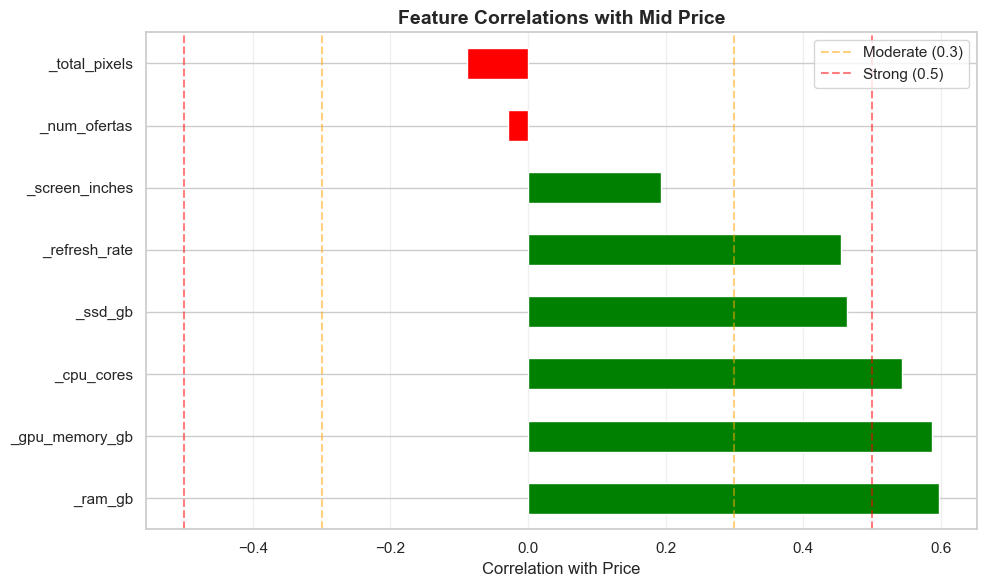

In [124]:
# Calculate correlations with mid price
features_to_correlate = ['_ram_gb', '_ssd_gb', '_screen_inches', '_cpu_cores', 
                         '_gpu_memory_gb', '_total_pixels', '_refresh_rate', 
                         '_weight_kg', '_num_ofertas']

# Filter to available features
available_features = [f for f in features_to_correlate if f in df.columns and df[f].notna().sum() > 10]

# Compute correlations
correlations = df[available_features + ['_mid_price']].corr()['_mid_price'].drop('_mid_price').sort_values(ascending=False)

print("\n=== Correlations with Price ===\n")
print(f"{'Feature':<20s} {'Correlation':>12s} {'Strength':>15s}")
print("-" * 50)
for feat, corr in correlations.items():
    if abs(corr) >= 0.5:
        strength = "Very Strong"
    elif abs(corr) >= 0.3:
        strength = "Moderate"
    else:
        strength = "Weak"
    print(f"{feat:<20s} {corr:>12.3f} {strength:>15s}")

# Visualization: Bar chart
fig, ax = plt.subplots(figsize=(10, 6))
correlations.plot(kind='barh', ax=ax, color=['green' if x > 0 else 'red' for x in correlations])
ax.set_xlabel('Correlation with Price', fontsize=12)
ax.set_title('Feature Correlations with Mid Price', fontsize=14, fontweight='bold')
ax.axvline(x=0.3, color='orange', linestyle='--', alpha=0.5, label='Moderate (0.3)')
ax.axvline(x=-0.3, color='orange', linestyle='--', alpha=0.5)
ax.axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='Strong (0.5)')
ax.axvline(x=-0.5, color='red', linestyle='--', alpha=0.5)
ax.legend()
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Key Insights:**
- Strong correlations (|r| > 0.5) indicate features highly predictive of price
- Moderate correlations (0.3 < |r| < 0.5) are useful but less dominant
- Weak correlations (|r| < 0.3) may still be useful in combination with other features
- Negative correlations mean the feature inversely relates to price

---

## 8. Visualizations with Engineered Features

This section provides detailed visualizations using the engineered features from `db_features.csv`.

**Prerequisites:** Run `02_feature_engineering.ipynb` first to generate `db_features.csv`.

In [135]:
# Load engineered features for comprehensive EDA
# NOTE: This requires running 02_feature_engineering.ipynb first to generate db_features.csv
df_features = pd.read_csv('../data/db_features.csv')
print(f"Loaded db_features.csv: {df_features.shape[0]:,} rows, {df_features.shape[1]} columns")

# Verify key engineered columns exist
eng_cols = [c for c in df_features.columns if c.startswith('_')]
print(f"\nEngineered features found: {len(eng_cols)}")
for col in ['_brand', '_precio_num', '_ram_gb', '_ssd_gb', '_cpu_mark', '_gpu_mark']:
    if col in df_features.columns:
        valid = df_features[col].notna().sum()
        print(f"  {col}: {valid:,} values ({valid/len(df_features)*100:.1f}%)")

Loaded db_features.csv: 7,767 rows, 63 columns

Engineered features found: 21
  _brand: 7,767 values (100.0%)
  _precio_num: 7,767 values (100.0%)
  _ram_gb: 6,519 values (83.9%)
  _ssd_gb: 6,436 values (82.9%)
  _cpu_mark: 6,715 values (86.5%)
  _gpu_mark: 6,422 values (82.7%)


### 8.1 Brand Distribution

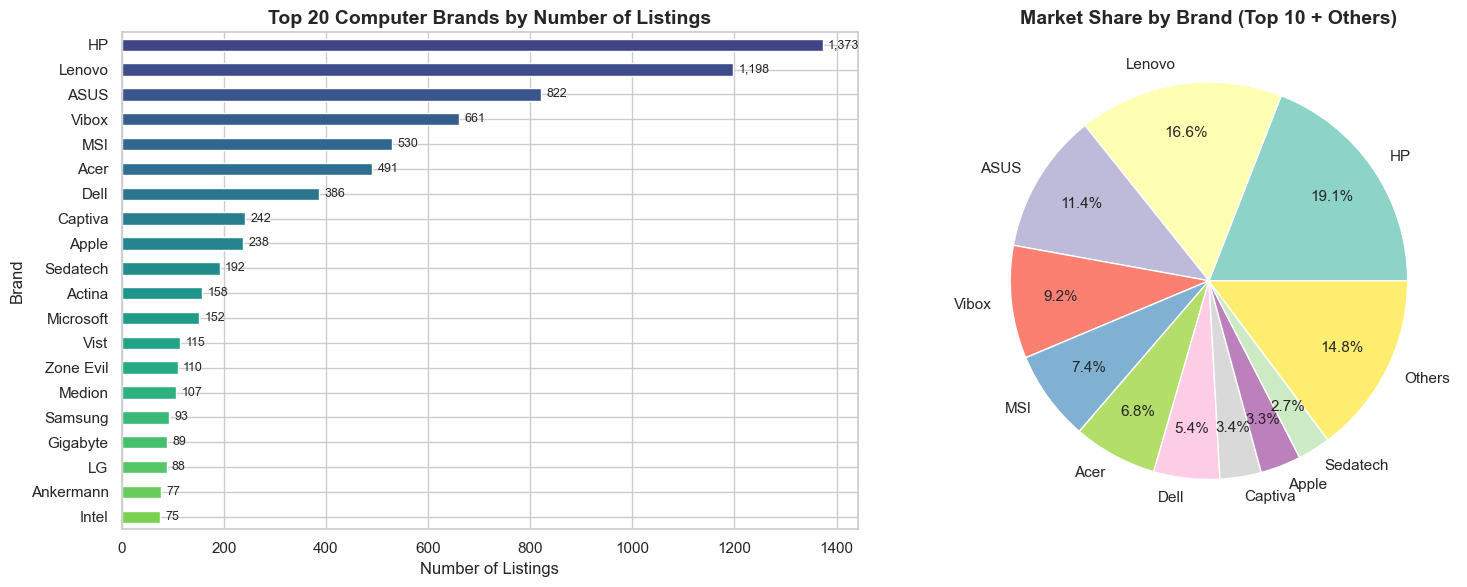


Total unique brands: 89
Top 5 brands account for 59.0% of all listings


In [136]:
# Brand Distribution - Top 20 brands
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
ax1 = axes[0]
brand_counts = df_features['_brand'].value_counts().head(20)
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(brand_counts)))
brand_counts.plot(kind='barh', ax=ax1, color=colors)
ax1.set_xlabel('Number of Listings', fontsize=12)
ax1.set_ylabel('Brand', fontsize=12)
ax1.set_title('Top 20 Computer Brands by Number of Listings', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Add count labels
for i, (brand, count) in enumerate(brand_counts.items()):
    ax1.text(count + 10, i, f'{count:,}', va='center', fontsize=9)

# Percentage pie chart for top 10
ax2 = axes[1]
top_10 = brand_counts.head(10)
others = brand_counts.iloc[10:].sum()
pie_data = pd.concat([top_10, pd.Series({'Others': others})])
wedges, texts, autotexts = ax2.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%',
                                    colors=plt.cm.Set3(np.linspace(0, 1, len(pie_data))),
                                    pctdistance=0.75)
ax2.set_title('Market Share by Brand (Top 10 + Others)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTotal unique brands: {df_features['_brand'].nunique()}")
print(f"Top 5 brands account for {brand_counts.head(5).sum() / len(df_features) * 100:.1f}% of all listings")

### 8.2 Product Categories (Tipo de producto)

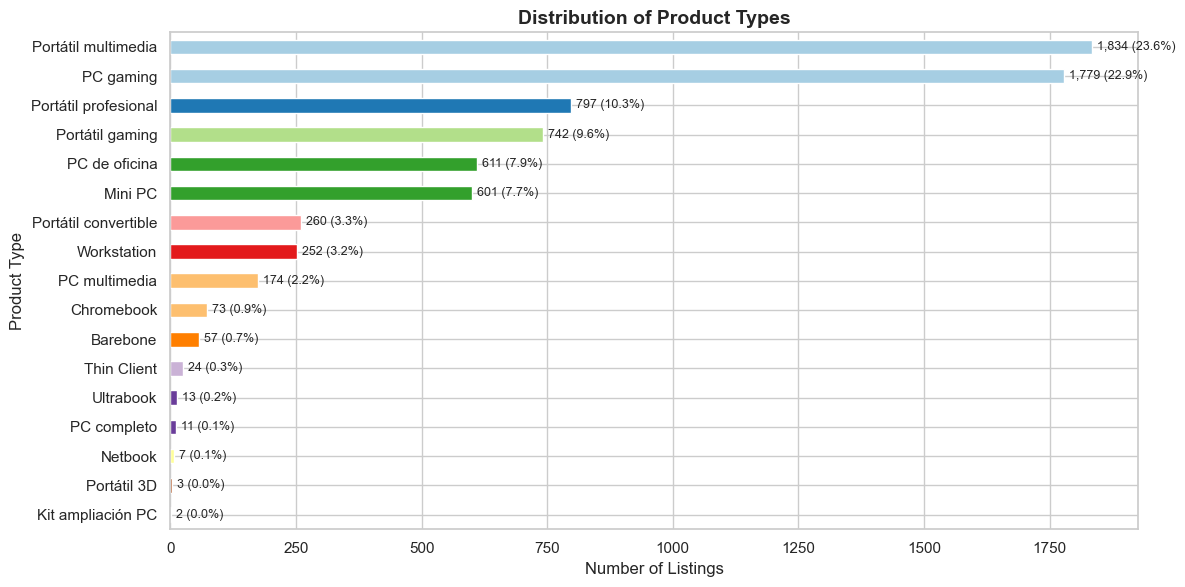


Product Category Summary:
Portátil multimedia     1834
PC gaming               1779
Portátil profesional     797
Portátil gaming          742
PC de oficina            611
Mini PC                  601
Portátil convertible     260
Workstation              252
PC multimedia            174
Chromebook                73
Barebone                  57
Thin Client               24
Ultrabook                 13
PC completo               11
Netbook                    7
Portátil 3D                3
Kit ampliación PC          2


In [137]:
# Product Categories Distribution
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart of product types
tipo_counts = df_features['Tipo de producto'].value_counts()
colors = plt.cm.Paired(np.linspace(0, 1, len(tipo_counts)))
tipo_counts.plot(kind='barh', ax=ax, color=colors)
ax.set_xlabel('Number of Listings', fontsize=12)
ax.set_ylabel('Product Type', fontsize=12)
ax.set_title('Distribution of Product Types', fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Add count labels
for i, (tipo, count) in enumerate(tipo_counts.items()):
    ax.text(count + 10, i, f'{count:,} ({count/len(df_features)*100:.1f}%)', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\nProduct Category Summary:")
print(tipo_counts.to_string())

### 8.3 Average Price by Brand

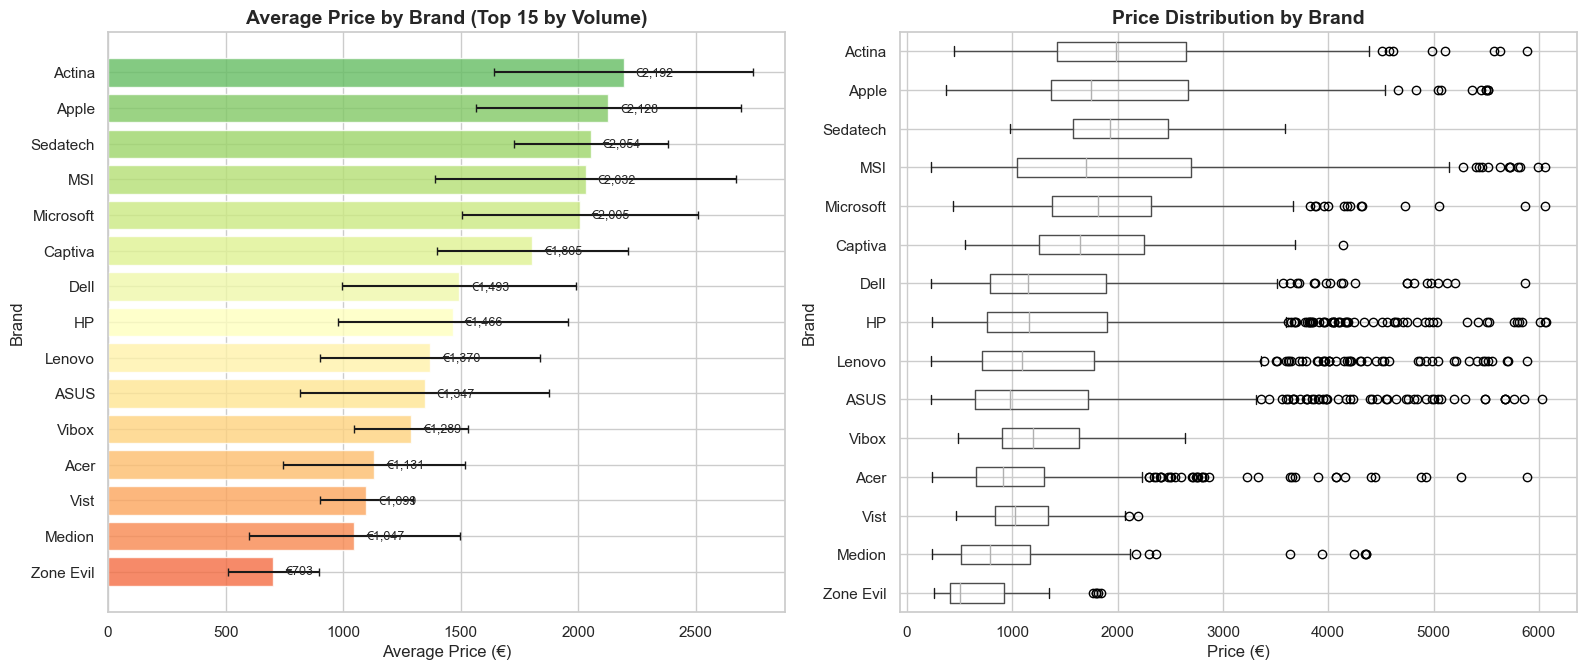


=== Price Statistics by Brand (Top 15) ===
Brand                   Count         Mean       Median          Std
------------------------------------------------------------------
Actina                    158 €     2,192 €     1,985 €     1,102
Apple                     238 €     2,128 €     1,747 €     1,130
Sedatech                  192 €     2,054 €     1,930 €       656
MSI                       530 €     2,032 €     1,699 €     1,279
Microsoft                 152 €     2,005 €     1,812 €     1,004
Captiva                   242 €     1,805 €     1,645 €       810
Dell                      386 €     1,493 €     1,150 €       999
HP                      1,373 €     1,466 €     1,162 €       978
Lenovo                  1,198 €     1,370 €     1,091 €       933
ASUS                      822 €     1,347 €       977 €     1,060
Vibox                     661 €     1,289 €     1,200 €       487
Acer                      491 €     1,131 €       912 €       774
Vist                      11

In [138]:
# Average Price by Brand (Top 15 brands by volume)
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Filter to top 15 brands by volume
top_brands = df_features['_brand'].value_counts().head(15).index.tolist()
df_top = df_features[df_features['_brand'].isin(top_brands)]

# Calculate stats
brand_stats = df_top.groupby('_brand')['_precio_num'].agg(['mean', 'median', 'std', 'count']).reset_index()
brand_stats = brand_stats.sort_values('mean', ascending=True)

# Bar chart of average prices
ax1 = axes[0]
y_pos = range(len(brand_stats))
bars = ax1.barh(y_pos, brand_stats['mean'], xerr=brand_stats['std']/2, 
                color=plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(brand_stats))),
                capsize=3, alpha=0.8)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(brand_stats['_brand'])
ax1.set_xlabel('Average Price (€)', fontsize=12)
ax1.set_ylabel('Brand', fontsize=12)
ax1.set_title('Average Price by Brand (Top 15 by Volume)', fontsize=14, fontweight='bold')

# Add price labels
for i, (idx, row) in enumerate(brand_stats.iterrows()):
    ax1.text(row['mean'] + 50, i, f"€{row['mean']:,.0f}", va='center', fontsize=9)

# Box plot of price distribution by brand
ax2 = axes[1]
brand_order = brand_stats['_brand'].tolist()
df_plot = df_top.copy()
df_plot['_brand'] = pd.Categorical(df_plot['_brand'], categories=brand_order, ordered=True)
df_plot.boxplot(column='_precio_num', by='_brand', ax=ax2, vert=False)
ax2.set_xlabel('Price (€)', fontsize=12)
ax2.set_ylabel('Brand', fontsize=12)
ax2.set_title('Price Distribution by Brand', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.show()

# Summary table
print("\n=== Price Statistics by Brand (Top 15) ===")
print(f"{'Brand':<20s} {'Count':>8s} {'Mean':>12s} {'Median':>12s} {'Std':>12s}")
print("-" * 66)
for _, row in brand_stats.sort_values('mean', ascending=False).iterrows():
    print(f"{row['_brand']:<20s} {int(row['count']):>8,} €{row['mean']:>10,.0f} €{row['median']:>10,.0f} €{row['std']:>10,.0f}")

### 8.4 RAM Configuration Analysis

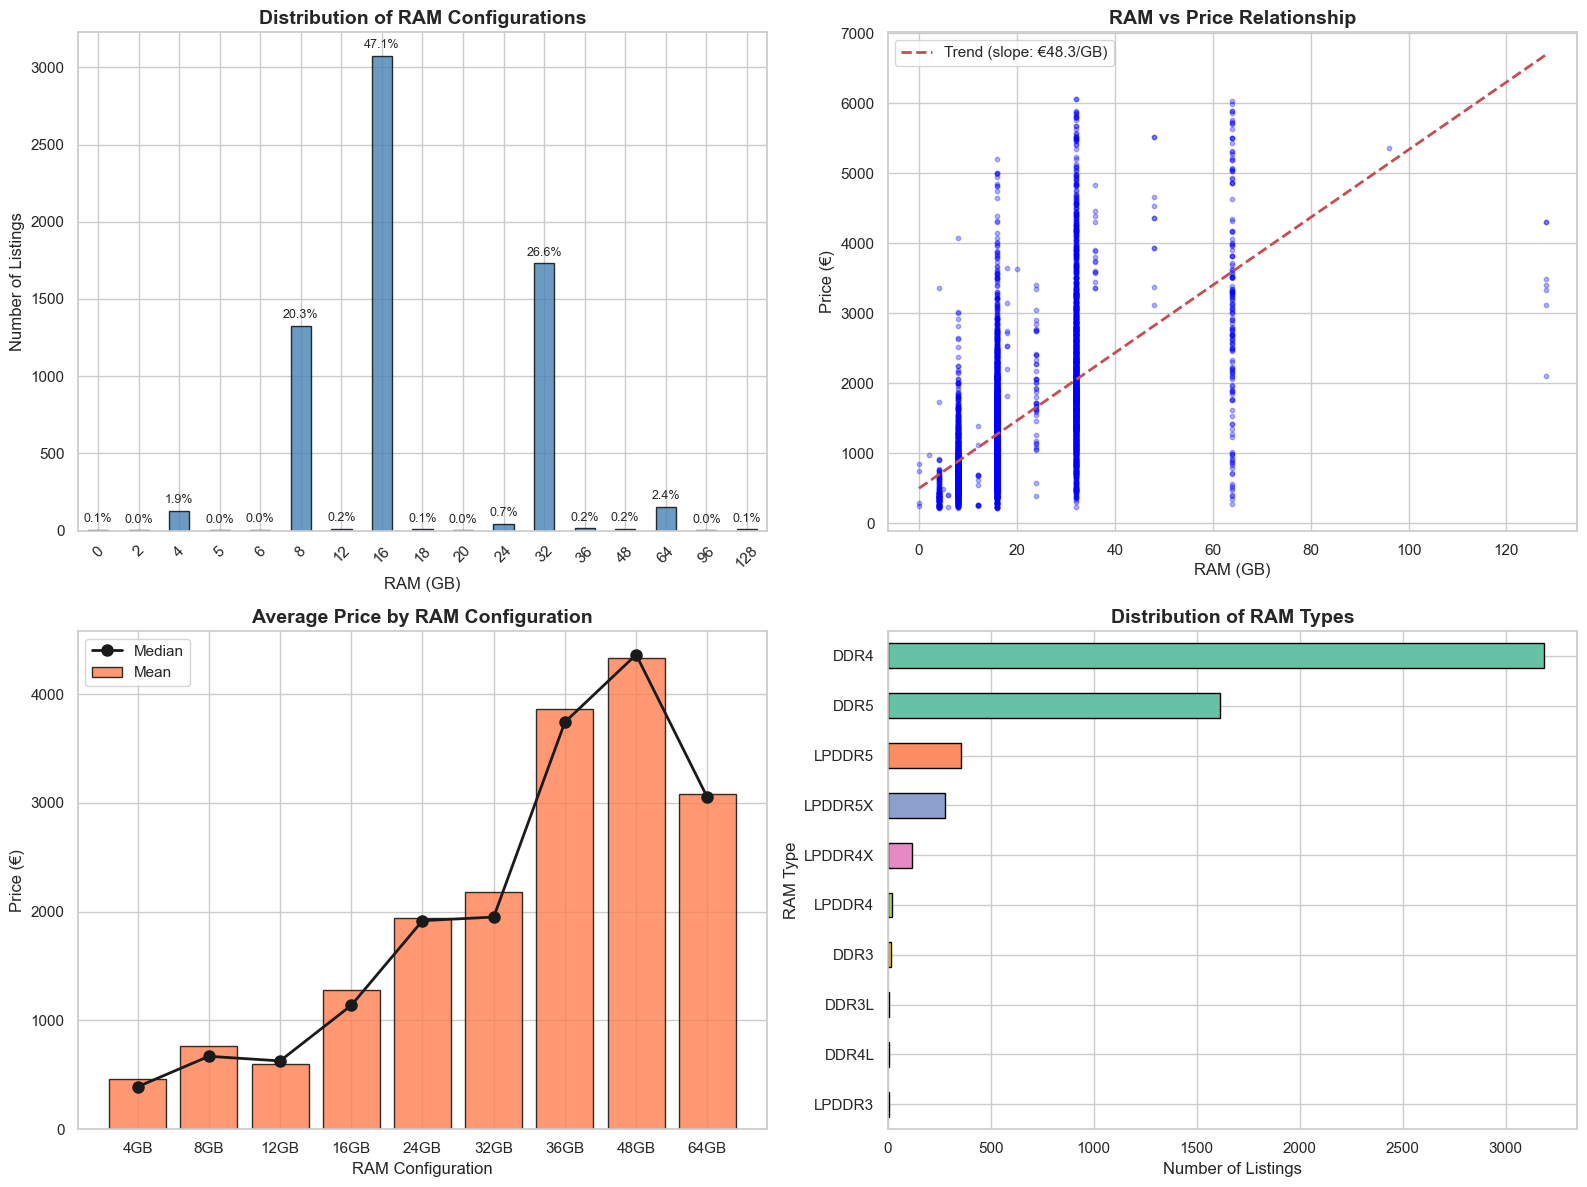


=== RAM Configuration Summary ===
Most common RAM: 16 GB (3,073 listings)
Average RAM: 19.8 GB
Median RAM: 16.0 GB

Price increase per GB of RAM: ~€48.3


In [139]:
# RAM Configuration Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. RAM Distribution
ax1 = axes[0, 0]
ram_counts = df_features['_ram_gb'].dropna().value_counts().sort_index()
ram_counts.plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black', alpha=0.8)
ax1.set_xlabel('RAM (GB)', fontsize=12)
ax1.set_ylabel('Number of Listings', fontsize=12)
ax1.set_title('Distribution of RAM Configurations', fontsize=14, fontweight='bold')
ax1.set_xticklabels([f'{int(x)}' for x in ram_counts.index], rotation=45)

# Add percentage labels
total = ram_counts.sum()
for i, (ram, count) in enumerate(ram_counts.items()):
    ax1.text(i, count + 50, f'{count/total*100:.1f}%', ha='center', fontsize=9)

# 2. RAM vs Price scatter
ax2 = axes[0, 1]
df_ram = df_features[df_features['_ram_gb'].notna() & df_features['_precio_num'].notna()]
ax2.scatter(df_ram['_ram_gb'], df_ram['_precio_num'], alpha=0.3, s=10, c='blue')
ax2.set_xlabel('RAM (GB)', fontsize=12)
ax2.set_ylabel('Price (€)', fontsize=12)
ax2.set_title('RAM vs Price Relationship', fontsize=14, fontweight='bold')

# Add trend line
if len(df_ram) > 10:
    z = np.polyfit(df_ram['_ram_gb'], df_ram['_precio_num'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df_ram['_ram_gb'].min(), df_ram['_ram_gb'].max(), 100)
    ax2.plot(x_line, p(x_line), 'r--', linewidth=2, label=f'Trend (slope: €{z[0]:.1f}/GB)')
    ax2.legend()

# 3. Average Price by RAM
ax3 = axes[1, 0]
ram_price = df_features.groupby('_ram_gb')['_precio_num'].agg(['mean', 'median', 'count']).reset_index()
ram_price = ram_price[ram_price['count'] >= 10]  # Filter low counts
x_pos = range(len(ram_price))
ax3.bar(x_pos, ram_price['mean'], color='coral', alpha=0.8, label='Mean', edgecolor='black')
ax3.plot(x_pos, ram_price['median'], 'ko-', linewidth=2, markersize=8, label='Median')
ax3.set_xticks(x_pos)
ax3.set_xticklabels([f'{int(x)}GB' for x in ram_price['_ram_gb']])
ax3.set_xlabel('RAM Configuration', fontsize=12)
ax3.set_ylabel('Price (€)', fontsize=12)
ax3.set_title('Average Price by RAM Configuration', fontsize=14, fontweight='bold')
ax3.legend()

# 4. RAM Type Distribution (if available)
ax4 = axes[1, 1]
if 'RAM_Tipo de RAM' in df_features.columns:
    ram_type = df_features['RAM_Tipo de RAM'].value_counts().head(10)
    colors = plt.cm.Set2(np.linspace(0, 1, len(ram_type)))
    ram_type.plot(kind='barh', ax=ax4, color=colors, edgecolor='black')
    ax4.set_xlabel('Number of Listings', fontsize=12)
    ax4.set_ylabel('RAM Type', fontsize=12)
    ax4.set_title('Distribution of RAM Types', fontsize=14, fontweight='bold')
    ax4.invert_yaxis()
else:
    ax4.text(0.5, 0.5, 'RAM Type data not available', ha='center', va='center', fontsize=14)
    ax4.set_axis_off()

plt.tight_layout()
plt.show()

# Summary statistics
print("\n=== RAM Configuration Summary ===")
print(f"Most common RAM: {int(df_features['_ram_gb'].mode().iloc[0])} GB ({df_features['_ram_gb'].value_counts().iloc[0]:,} listings)")
print(f"Average RAM: {df_features['_ram_gb'].mean():.1f} GB")
print(f"Median RAM: {df_features['_ram_gb'].median():.1f} GB")
print(f"\nPrice increase per GB of RAM: ~€{z[0]:.1f}" if len(df_ram) > 10 else "")

### 8.5 Storage (SSD) Configuration

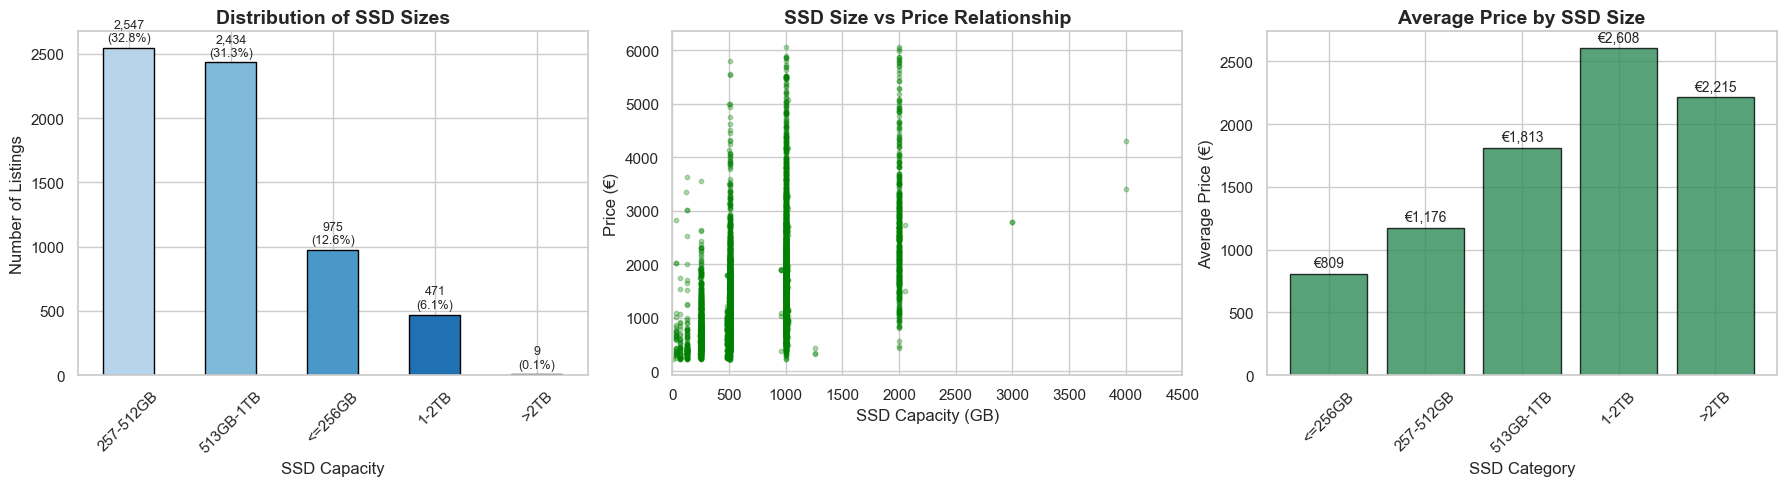


=== SSD Configuration Summary ===
Most common SSD size: 1000 GB
Average SSD size: 763 GB
Median SSD size: 512 GB


In [140]:
# Storage (SSD) Configuration Analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. SSD Size Distribution
ax1 = axes[0]
ssd_counts = df_features['_ssd_gb'].dropna().value_counts().sort_index()
# Group into categories for better visualization
ssd_categories = pd.cut(df_features['_ssd_gb'].dropna(), 
                        bins=[0, 256, 512, 1000, 2000, 10000],
                        labels=['<=256GB', '257-512GB', '513GB-1TB', '1-2TB', '>2TB'])
ssd_cat_counts = ssd_categories.value_counts()
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(ssd_cat_counts)))
ssd_cat_counts.plot(kind='bar', ax=ax1, color=colors, edgecolor='black')
ax1.set_xlabel('SSD Capacity', fontsize=12)
ax1.set_ylabel('Number of Listings', fontsize=12)
ax1.set_title('Distribution of SSD Sizes', fontsize=14, fontweight='bold')
ax1.set_xticklabels(ssd_cat_counts.index, rotation=45)

# Add percentage labels
for i, (cat, count) in enumerate(ssd_cat_counts.items()):
    ax1.text(i, count + 50, f'{count:,}\n({count/len(df_features)*100:.1f}%)', ha='center', fontsize=9)

# 2. SSD vs Price scatter
ax2 = axes[1]
df_ssd = df_features[df_features['_ssd_gb'].notna() & df_features['_precio_num'].notna()]
ax2.scatter(df_ssd['_ssd_gb'], df_ssd['_precio_num'], alpha=0.3, s=10, c='green')
ax2.set_xlabel('SSD Capacity (GB)', fontsize=12)
ax2.set_ylabel('Price (€)', fontsize=12)
ax2.set_title('SSD Size vs Price Relationship', fontsize=14, fontweight='bold')
ax2.set_xlim(0, 4500)  # Limit x-axis for clarity

# 3. Average Price by SSD Category
ax3 = axes[2]
df_features['_ssd_category'] = pd.cut(df_features['_ssd_gb'], 
                                      bins=[0, 256, 512, 1000, 2000, 10000],
                                      labels=['<=256GB', '257-512GB', '513GB-1TB', '1-2TB', '>2TB'])
ssd_price = df_features.groupby('_ssd_category')['_precio_num'].agg(['mean', 'median', 'count']).reset_index()
ssd_price = ssd_price.dropna()
x_pos = range(len(ssd_price))
ax3.bar(x_pos, ssd_price['mean'], color='seagreen', alpha=0.8, edgecolor='black')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(ssd_price['_ssd_category'], rotation=45)
ax3.set_xlabel('SSD Category', fontsize=12)
ax3.set_ylabel('Average Price (€)', fontsize=12)
ax3.set_title('Average Price by SSD Size', fontsize=14, fontweight='bold')

# Add price labels
for i, (idx, row) in enumerate(ssd_price.iterrows()):
    ax3.text(i, row['mean'] + 50, f"€{row['mean']:,.0f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Clean up temporary column
df_features.drop(columns=['_ssd_category'], inplace=True, errors='ignore')

print("\n=== SSD Configuration Summary ===")
print(f"Most common SSD size: {int(df_features['_ssd_gb'].mode().iloc[0])} GB")
print(f"Average SSD size: {df_features['_ssd_gb'].mean():.0f} GB")
print(f"Median SSD size: {df_features['_ssd_gb'].median():.0f} GB")

### 8.6 CPU and GPU Performance Analysis

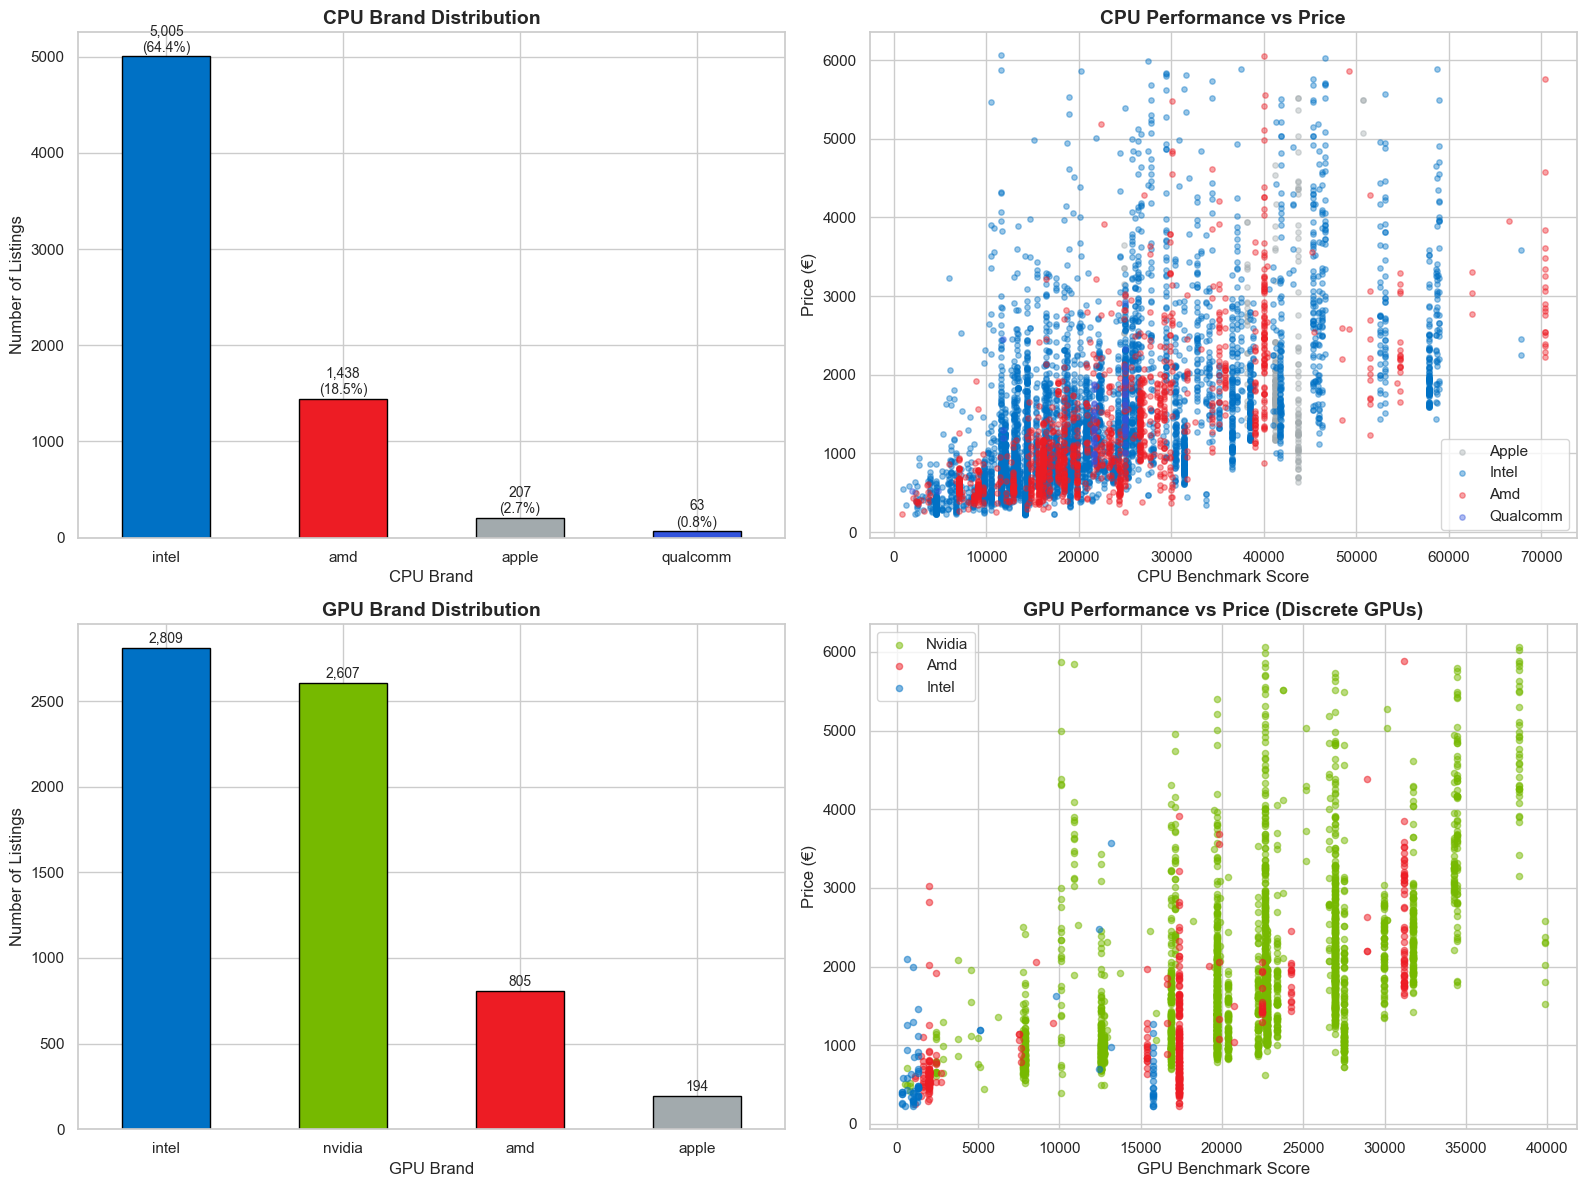


=== CPU/GPU Benchmark Coverage ===
CPU benchmark matched: 86.5%
GPU benchmark matched: 82.7%


In [141]:
# CPU and GPU Performance Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. CPU Brand Distribution
ax1 = axes[0, 0]
if 'cpu_brand' in df_features.columns:
    cpu_brand = df_features['cpu_brand'].value_counts()
    colors = {'intel': '#0071c5', 'amd': '#ED1C24', 'apple': '#A2AAAD', 'qualcomm': '#3253DC'}
    bar_colors = [colors.get(b, 'gray') for b in cpu_brand.index]
    cpu_brand.plot(kind='bar', ax=ax1, color=bar_colors, edgecolor='black')
    ax1.set_xlabel('CPU Brand', fontsize=12)
    ax1.set_ylabel('Number of Listings', fontsize=12)
    ax1.set_title('CPU Brand Distribution', fontsize=14, fontweight='bold')
    ax1.set_xticklabels(cpu_brand.index, rotation=0)
    
    for i, (brand, count) in enumerate(cpu_brand.items()):
        ax1.text(i, count + 50, f'{count:,}\n({count/len(df_features)*100:.1f}%)', ha='center', fontsize=10)

# 2. CPU Benchmark vs Price
ax2 = axes[0, 1]
if '_cpu_mark' in df_features.columns:
    df_cpu = df_features[df_features['_cpu_mark'].notna() & df_features['_precio_num'].notna()]
    
    if 'cpu_brand' in df_features.columns:
        for brand in df_cpu['cpu_brand'].dropna().unique():
            mask = df_cpu['cpu_brand'] == brand
            color = colors.get(brand, 'gray')
            ax2.scatter(df_cpu.loc[mask, '_cpu_mark'], df_cpu.loc[mask, '_precio_num'], 
                       alpha=0.4, s=15, c=color, label=brand.capitalize())
        ax2.legend()
    else:
        ax2.scatter(df_cpu['_cpu_mark'], df_cpu['_precio_num'], alpha=0.3, s=10, c='blue')
    
    ax2.set_xlabel('CPU Benchmark Score', fontsize=12)
    ax2.set_ylabel('Price (€)', fontsize=12)
    ax2.set_title('CPU Performance vs Price', fontsize=14, fontweight='bold')

# 3. GPU Brand Distribution
ax3 = axes[1, 0]
if 'gpu_brand' in df_features.columns:
    gpu_brand = df_features['gpu_brand'].value_counts().head(6)
    gpu_colors = {'nvidia': '#76b900', 'intel': '#0071c5', 'amd': '#ED1C24', 'apple': '#A2AAAD'}
    bar_colors = [gpu_colors.get(b, 'gray') for b in gpu_brand.index]
    gpu_brand.plot(kind='bar', ax=ax3, color=bar_colors, edgecolor='black')
    ax3.set_xlabel('GPU Brand', fontsize=12)
    ax3.set_ylabel('Number of Listings', fontsize=12)
    ax3.set_title('GPU Brand Distribution', fontsize=14, fontweight='bold')
    ax3.set_xticklabels(gpu_brand.index, rotation=0)
    
    for i, (brand, count) in enumerate(gpu_brand.items()):
        ax3.text(i, count + 30, f'{count:,}', ha='center', fontsize=10)

# 4. GPU Benchmark vs Price (discrete GPUs only)
ax4 = axes[1, 1]
if '_gpu_mark' in df_features.columns:
    df_gpu = df_features[
        df_features['_gpu_mark'].notna() & 
        df_features['_precio_num'].notna() &
        (df_features.get('gpu_is_integrated', False) != True)
    ]
    
    if 'gpu_brand' in df_features.columns and len(df_gpu) > 0:
        for brand in df_gpu['gpu_brand'].dropna().unique():
            mask = df_gpu['gpu_brand'] == brand
            color = gpu_colors.get(brand, 'gray')
            ax4.scatter(df_gpu.loc[mask, '_gpu_mark'], df_gpu.loc[mask, '_precio_num'], 
                       alpha=0.5, s=20, c=color, label=brand.capitalize())
        ax4.legend()
    elif len(df_gpu) > 0:
        ax4.scatter(df_gpu['_gpu_mark'], df_gpu['_precio_num'], alpha=0.3, s=10, c='green')
    
    ax4.set_xlabel('GPU Benchmark Score', fontsize=12)
    ax4.set_ylabel('Price (€)', fontsize=12)
    ax4.set_title('GPU Performance vs Price (Discrete GPUs)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print coverage statistics
print("\n=== CPU/GPU Benchmark Coverage ===")
if '_cpu_mark' in df_features.columns:
    cpu_coverage = df_features['_cpu_mark'].notna().mean() * 100
    print(f"CPU benchmark matched: {cpu_coverage:.1f}%")
if '_gpu_mark' in df_features.columns:
    gpu_coverage = df_features['_gpu_mark'].notna().mean() * 100
    print(f"GPU benchmark matched: {gpu_coverage:.1f}%")

### 8.7 Screen Size and Resolution

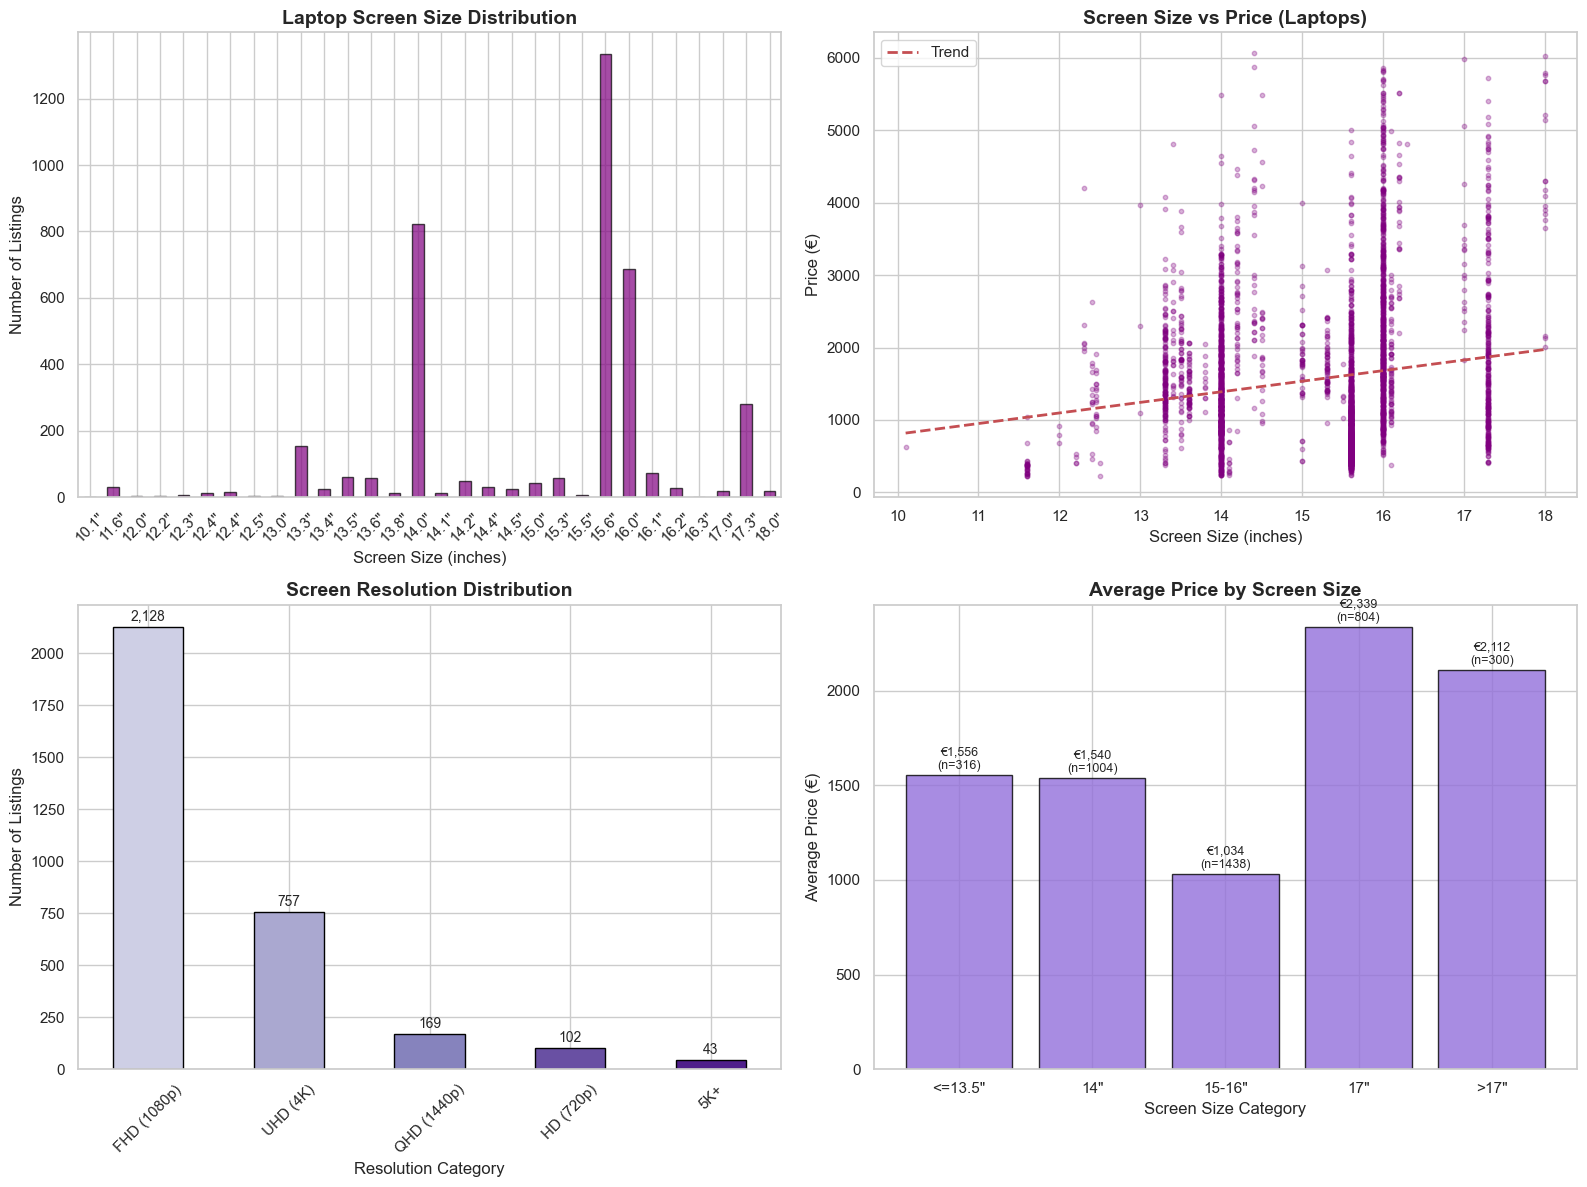


=== Screen Size Summary (Laptops) ===
Most common size: 15.6 inches
Average size: 15.2 inches


In [142]:
# Screen Size and Resolution Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Screen Size Distribution (Laptops only)
ax1 = axes[0, 0]
df_laptops = df_features[df_features['Tipo'] == 'Laptop']
screen_counts = df_laptops['_tamano_pantalla_pulgadas'].dropna().value_counts().sort_index()
# Group common sizes
screen_counts.plot(kind='bar', ax=ax1, color='purple', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Screen Size (inches)', fontsize=12)
ax1.set_ylabel('Number of Listings', fontsize=12)
ax1.set_title('Laptop Screen Size Distribution', fontsize=14, fontweight='bold')
ax1.set_xticklabels([f'{x:.1f}"' for x in screen_counts.index], rotation=45)

# 2. Screen Size vs Price
ax2 = axes[0, 1]
df_screen = df_laptops[df_laptops['_tamano_pantalla_pulgadas'].notna() & df_laptops['_precio_num'].notna()]
ax2.scatter(df_screen['_tamano_pantalla_pulgadas'], df_screen['_precio_num'], alpha=0.3, s=10, c='purple')
ax2.set_xlabel('Screen Size (inches)', fontsize=12)
ax2.set_ylabel('Price (€)', fontsize=12)
ax2.set_title('Screen Size vs Price (Laptops)', fontsize=14, fontweight='bold')

# Add trend line
if len(df_screen) > 10:
    z = np.polyfit(df_screen['_tamano_pantalla_pulgadas'], df_screen['_precio_num'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df_screen['_tamano_pantalla_pulgadas'].min(), 
                         df_screen['_tamano_pantalla_pulgadas'].max(), 100)
    ax2.plot(x_line, p(x_line), 'r--', linewidth=2, label=f'Trend')
    ax2.legend()

# 3. Resolution Distribution
ax3 = axes[1, 0]
if '_resolucion_pixeles' in df_features.columns:
    # Categorize resolutions
    def categorize_resolution(pixels):
        if pd.isna(pixels):
            return np.nan
        if pixels < 1_500_000:
            return 'HD (720p)'
        elif pixels < 2_500_000:
            return 'FHD (1080p)'
        elif pixels < 4_000_000:
            return 'QHD (1440p)'
        elif pixels < 9_000_000:
            return 'UHD (4K)'
        else:
            return '5K+'
    
    df_features['_res_category'] = df_features['_resolucion_pixeles'].apply(categorize_resolution)
    res_counts = df_features['_res_category'].value_counts()
    colors = plt.cm.Purples(np.linspace(0.3, 0.9, len(res_counts)))
    res_counts.plot(kind='bar', ax=ax3, color=colors, edgecolor='black')
    ax3.set_xlabel('Resolution Category', fontsize=12)
    ax3.set_ylabel('Number of Listings', fontsize=12)
    ax3.set_title('Screen Resolution Distribution', fontsize=14, fontweight='bold')
    ax3.set_xticklabels(res_counts.index, rotation=45)
    
    for i, (res, count) in enumerate(res_counts.items()):
        ax3.text(i, count + 30, f'{count:,}', ha='center', fontsize=10)
    
    df_features.drop(columns=['_res_category'], inplace=True, errors='ignore')

# 4. Average Price by Screen Size Category
ax4 = axes[1, 1]
df_laptops['_screen_category'] = pd.cut(df_laptops['_tamano_pantalla_pulgadas'], 
                                        bins=[0, 13.5, 14.5, 15.9, 17, 20],
                                        labels=['<=13.5"', '14"', '15-16"', '17"', '>17"'])
screen_price = df_laptops.groupby('_screen_category')['_precio_num'].agg(['mean', 'count']).reset_index()
screen_price = screen_price.dropna()
x_pos = range(len(screen_price))
ax4.bar(x_pos, screen_price['mean'], color='mediumpurple', alpha=0.8, edgecolor='black')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(screen_price['_screen_category'])
ax4.set_xlabel('Screen Size Category', fontsize=12)
ax4.set_ylabel('Average Price (€)', fontsize=12)
ax4.set_title('Average Price by Screen Size', fontsize=14, fontweight='bold')

for i, (idx, row) in enumerate(screen_price.iterrows()):
    ax4.text(i, row['mean'] + 30, f"€{row['mean']:,.0f}\n(n={int(row['count'])})", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n=== Screen Size Summary (Laptops) ===")
print(f"Most common size: {df_laptops['_tamano_pantalla_pulgadas'].mode().iloc[0]:.1f} inches")
print(f"Average size: {df_laptops['_tamano_pantalla_pulgadas'].mean():.1f} inches")

### 8.8 Price Distribution by Product Category

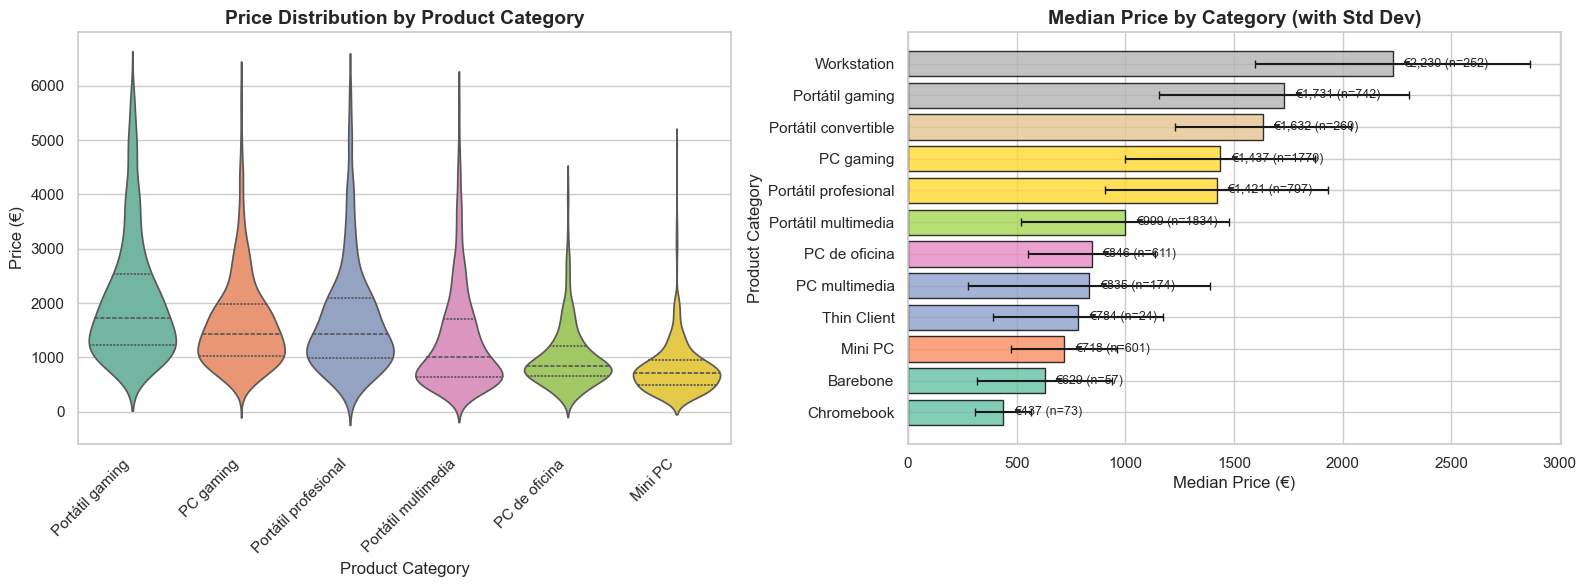

In [143]:
# Price Distribution by Product Category (Violin Plot)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Violin plot
ax1 = axes[0]
main_tipos = df_features['Tipo de producto'].value_counts().head(6).index.tolist()
df_violin = df_features[df_features['Tipo de producto'].isin(main_tipos)]

# Order by median price
order = df_violin.groupby('Tipo de producto')['_precio_num'].median().sort_values(ascending=False).index

sns.violinplot(data=df_violin, x='Tipo de producto', y='_precio_num', 
               order=order, ax=ax1, palette='Set2', inner='quartile')
ax1.set_xlabel('Product Category', fontsize=12)
ax1.set_ylabel('Price (€)', fontsize=12)
ax1.set_title('Price Distribution by Product Category', fontsize=14, fontweight='bold')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Statistics summary
ax2 = axes[1]
tipo_stats = df_features.groupby('Tipo de producto')['_precio_num'].agg(['count', 'mean', 'median', 'std']).reset_index()
tipo_stats = tipo_stats[tipo_stats['count'] >= 20]
tipo_stats = tipo_stats.sort_values('median', ascending=True)

y_pos = range(len(tipo_stats))
bars = ax2.barh(y_pos, tipo_stats['median'], xerr=tipo_stats['std']/2, 
                color=plt.cm.Set2(np.linspace(0, 1, len(tipo_stats))),
                capsize=3, alpha=0.8, edgecolor='black')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(tipo_stats['Tipo de producto'])
ax2.set_xlabel('Median Price (€)', fontsize=12)
ax2.set_ylabel('Product Category', fontsize=12)
ax2.set_title('Median Price by Category (with Std Dev)', fontsize=14, fontweight='bold')

for i, (idx, row) in enumerate(tipo_stats.iterrows()):
    ax2.text(row['median'] + 50, i, f"€{row['median']:,.0f} (n={int(row['count'])})", va='center', fontsize=9)

plt.tight_layout()
plt.show()

## 9. Summary and Next Steps

### Key EDA Findings

**Dataset Overview:**
- Total listings: 8,000+ computers from a European marketplace
- Mix of laptops and desktops across multiple product categories
- 89 unique brands, with HP, Lenovo, ASUS, Vibox, and MSI being most common

**Price Insights:**
- Price range: ~€200 to €15,000+ (median ~€1,000)
- Gaming laptops and workstations command premium prices
- Apple products have the highest average prices among major brands
- Strong positive correlation between CPU/GPU benchmarks and price

**Feature Importance (for modeling):**
1. **CPU Benchmark** - Strongest predictor of price
2. **GPU Benchmark** - Critical for gaming/workstation categories
3. **RAM Configuration** - Clear price tiers (8GB, 16GB, 32GB)
4. **Product Category** - Gaming vs multimedia vs professional
5. **Brand** - Premium brands (Apple, Razer) vs value brands (Acer, Lenovo)

**Data Quality:**
- Brand extraction handles compound names (Deep Gaming, Zone Evil, etc.)
- CPU benchmark matched for ~60% of listings
- GPU benchmark matched for ~25% (many integrated GPUs)
- Screen size and RAM have good coverage

**Notebook Flow:**
1. **01_eda.ipynb** (this notebook) - Exploratory data analysis
2. **02_feature_engineering.ipynb** - Feature creation and benchmark matching
3. **03_model_training.ipynb** - Model training and evaluation
4. **04_model_optimization.ipynb** - Hyperparameter tuning

In [134]:
# Cleanup temporary columns
temp_cols = ['_precio_eda', '_log_precio', '_min_price', '_max_price', '_mid_price', 
             '_price_spread', '_spread_pct', '_num_ofertas', '_brand_extracted', 
             '_series_extracted', '_pulgadas_num', '_cm_num', '_cm_from_pulgadas',
             '_ram_gb', '_ssd_gb', '_screen_inches', '_cpu_cores', '_gpu_memory_gb',
             '_res_width', '_res_height', '_total_pixels', '_refresh_rate', '_weight_kg']

dropped = 0
for col in temp_cols:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)
        dropped += 1

print(f"EDA complete! Dropped {dropped} temporary columns.")
print("Next: 02_feature_engineering.ipynb")

EDA complete! Dropped 23 temporary columns.
Next: 02_feature_engineering.ipynb
